<IPython.core.display.Javascript object>


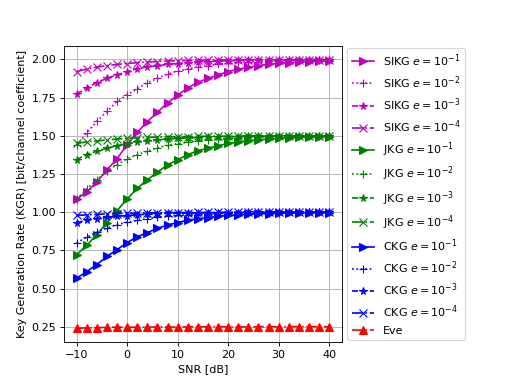

=== CSI error: 0.1 ===
SNR(db) is -10 db
SNR(db) is -8 db
SNR(db) is -6 db
SNR(db) is -4 db
SNR(db) is -2 db
SNR(db) is 0 db
SNR(db) is 2 db
SNR(db) is 4 db
SNR(db) is 6 db
SNR(db) is 8 db
SNR(db) is 10 db
SNR(db) is 12 db
SNR(db) is 14 db
SNR(db) is 16 db
SNR(db) is 18 db
SNR(db) is 20 db
SNR(db) is 22 db
SNR(db) is 24 db
SNR(db) is 26 db
SNR(db) is 28 db
SNR(db) is 30 db
SNR(db) is 32 db
SNR(db) is 34 db
SNR(db) is 36 db
SNR(db) is 38 db
SNR(db) is 40 db
=== CSI error: 0.01 ===
SNR(db) is -10 db
SNR(db) is -8 db
SNR(db) is -6 db
SNR(db) is -4 db
SNR(db) is -2 db
SNR(db) is 0 db
SNR(db) is 2 db
SNR(db) is 4 db
SNR(db) is 6 db
SNR(db) is 8 db
SNR(db) is 10 db
SNR(db) is 12 db
SNR(db) is 14 db
SNR(db) is 16 db
SNR(db) is 18 db
SNR(db) is 20 db
SNR(db) is 22 db
SNR(db) is 24 db
SNR(db) is 26 db
SNR(db) is 28 db
SNR(db) is 30 db
SNR(db) is 32 db
SNR(db) is 34 db
SNR(db) is 36 db
SNR(db) is 38 db
SNR(db) is 40 db
=== CSI error: 0.001 ===
SNR(db) is -10 db
SNR(db) is -8 db
SNR(db) is -6 db


In [1]:
## Chapter 3. KGR.

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)

def plot_subcarriers(H, NullCarriers):
    plt.plot(np.concatenate(
        (np.zeros(NullCarriers[0]), np.abs(H), np.zeros(NullCarriers[1]))
    ))
    
def index_to_bits1(ind1, ind2):
    if (ind1, ind2) == (0, 0) or (ind1, ind2) == (0, 1):
        return [1, 0, 1, 0]
    elif (ind1, ind2) == (0, 2) or (ind1, ind2) == (0, 3):
        return [0, 1, 0, 1]
    elif (ind1, ind2) == (1, 0) or (ind1, ind2) == (2, 0):
        return [1, 1, 0, 1]
    elif (ind1, ind2) == (1, 1) or (ind1, ind2) == (1, 2):
        return [1, 0, 1, 1]
    elif (ind1, ind2) == (1, 3) or (ind1, ind2) == (2, 3):
        return [0, 0, 1, 0]
    elif (ind1, ind2) == (2, 1) or (ind1, ind2) == (2, 2):
        return [1, 0, 0, 0]
    elif (ind1, ind2) == (3, 0) or (ind1, ind2) == (3, 1):
        return [1, 0, 0, 1]
    return [0, 1, 1, 0]

def index_to_bits(ind1, ind2):
    if (ind1, ind2) == (0, 0) or (ind1, ind2) == (0, 1) or (ind1, ind2) == (1, 0) or (ind1, ind2) == (1, 1):
        return [1, 0, 1, 0]
    elif (ind1, ind2) == (2, 0) or (ind1, ind2) == (2, 1) or (ind1, ind2) == (3, 0) or (ind1, ind2) == (3, 1):
        return [0, 1, 1, 0]
    elif (ind1, ind2) == (0, 2) or (ind1, ind2) == (0, 3) or (ind1, ind2) == (1, 2) or (ind1, ind2) == (1, 3):
        return [1, 0, 0, 1]
    return [0, 1, 0, 1]

## NIAKG lookup table. Stupid and shitty codes ...
def niakg_to_bits(m, inds):
    if m == 1 and inds == [0]:
        return [0, 0, 0, 1]
    elif m == 1 and inds == [1]:
        return [0, 0, 1, 0]
    elif m == 1 and inds == [2]:
        return [0, 0, 1, 1]
    elif m == 1 and inds == [3]:
        return [0, 1, 0, 0]
    elif m == 2 and inds == [0, 1]:
        return [0, 1, 0, 1]
    elif m == 2 and inds == [0, 2]:
        return [0, 1, 1, 0]
    elif m == 2 and inds == [0, 3]:
        return [0, 1, 1, 1]
    elif m == 2 and inds == [1, 2]:
        return [1, 0, 0, 0]
    elif m == 2 and inds == [1, 3]:
        return [1, 0, 0, 1]
    elif m == 2 and inds == [2, 3]:
        return [1, 0, 1, 0]
    elif m == 3 and inds == [0, 1, 2]:
        return [1, 0, 1, 1]
    elif m == 3 and inds == [0, 1, 3]:
        return [1, 1, 0, 0]
    elif m == 3 and inds == [0, 2, 3]:
        return [1, 1, 0, 1]
    else:
        return [1, 1, 1, 0]

M = 4         ## M-ary modulation size
N = 64        ## Number of sub-carriers
K = 1         ## Number of active sub-carriers
NPkt = 1000   ## Number of transmission packets.

KGR_k1_mmse = []
KMR_k1_mmse = []
KGR_k2_mmse = []
KMR_k2_mmse = []
KGR_JKG_mmse = []
KMR_JKG_mmse = []
KGR_NIAKG_mmse = []
KMR_NIAKG_mmse = []

eve_corr = 0.01
KGR_EVE_mmse = []
KMR_EVE_mmse = []

## Iterate over MMSEs
for MMSE in [10.0, 100.0, 1000.0, 10000.0]:
    print('=== CSI error: {} ==='.format(1 / MMSE))
    PERMUTE = np.random.permutation(4) ## Random Interleaver
    NChCoeff = 2                       ## Number of channel coefficient (Rayleigh channel).

    EbN0S = [x for x in range(-10, 42, 2)]

    KGRs_k1 = []
    KMRs_k1 = []
    KLRs_k1 = []

    KGRs_k2 = []
    KMRs_k2 = []
    KLRs_k2 = []

    KGRs_JKG = []
    KMRs_JKG = []
    KLRs_JKG = []

    KGRs_NIAKG = []
    KMRs_NIAKG = []
    KLRs_NIAKG = []

    KGRs_EVE = []
    KMRs_EVE = []
    KLRs_EVE = []

    ## for EbN0 in range(0, 45, 5):
    for EbN0 in EbN0S:
        print('SNR(db) is {} db'.format(EbN0))
        EsN0 = 10 ** (EbN0 / 10)
        sigma = np.sqrt(1 / EsN0) ## Additive noise variance.
        eps = 1 / (1 + MMSE * EsN0)

        ## Transmission over Rayleigh fading channel.
        noise = (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * np.random.randn(NPkt, N))

        ## Alice -> Bob.
        H1 = (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N))) * np.sqrt(1 - eps)
        e1 = (np.sqrt(eps) / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N)))
        Hab = H1 + e1

        ## Bob -> Alice.
        e2 = (np.sqrt(eps) / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N)))
        Hba = H1 + e2

        ## Alice -> Eve.
        Hae = eve_corr * H1 + (1 - eve_corr) * (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N))) * np.sqrt(1 - eps)

        KGR_k1 = 0.0
        KMR_k1 = 0.0
        KLR_k1 = 0.0

        KGR_k2 = 0.0
        KMR_k2 = 0.0
        KLR_k2 = 0.0

        KGR_JKG = 0.0
        KMR_JKG = 0.0
        KLR_JKG = 0.0

        KGR_NIAKG = 0.0
        KMR_NIAKG = 0.0
        KLR_NIAKG = 0.0

        KGR_EVE = 0.0
        KMR_EVE = 0.0
        KLR_EVE = 0.0

        for PktIndex in range(NPkt):
            for G in range(0, N, 4):
                ## Apply random interlevaer to each block.
                subcarrier_blk_ab = Hab[PktIndex][G:G+4][PERMUTE]
                subcarrier_blk_ba = Hba[PktIndex][G:G+4][PERMUTE]
                subcarrier_blk_ae = Hae[PktIndex][G:G+4][PERMUTE]

                subcarrier_blk_amp_ab = np.abs(subcarrier_blk_ab)
                subcarrier_blk_amp_ba = np.abs(subcarrier_blk_ba)
                subcarrier_blk_amp_ae = np.abs(subcarrier_blk_ae)

                avg_ab = np.average(subcarrier_blk_amp_ab)
                avg_ba = np.average(subcarrier_blk_amp_ba)
                avg_ae = np.average(subcarrier_blk_amp_ae)

                k1_ab = [1 if x > avg_ab else 0 for x in subcarrier_blk_amp_ab]
                k1_ba = [1 if x > avg_ba else 0 for x in subcarrier_blk_amp_ba]
                k1_ae = [1 if x > avg_ae else 0 for x in subcarrier_blk_amp_ae]

                ## Improved Index based algos.
                max_diff_ab = 0.0
                max_diff_ba = 0.0
                max_diff_ae = 0.0
                max_pos_ab = -1
                max_pos_ba = -1
                max_pos_ae = -1

                min_diff_ab = 9999.0
                min_diff_ba = 9999.0
                min_diff_ae = 9999.0
                min_pos_ab = -1
                min_pos_ba = -1
                min_pos_ae = -1

                for b in range(4):
                    if np.abs(subcarrier_blk_amp_ab[b] - avg_ab) > max_diff_ab:
                        max_diff_ab = np.abs(subcarrier_blk_amp_ab[b] - avg_ab)
                        max_pos_ab = b
                    if np.abs(subcarrier_blk_amp_ba[b] - avg_ba) > max_diff_ba:
                        max_diff_ba = np.abs(subcarrier_blk_amp_ba[b] - avg_ba)
                        max_pos_ba = b
                    if np.abs(subcarrier_blk_amp_ae[b] - avg_ae) > max_diff_ae:
                        max_diff_ae = np.abs(subcarrier_blk_amp_ae[b] - avg_ae)
                        max_pos_ae = b
                    if np.abs(subcarrier_blk_amp_ab[b] - avg_ab) < min_diff_ab:
                        min_diff_ab = np.abs(subcarrier_blk_amp_ab[b] - avg_ab)
                        min_pos_ab = b
                    if np.abs(subcarrier_blk_amp_ba[b] - avg_ba) < min_diff_ba:
                        min_diff_ba = np.abs(subcarrier_blk_amp_ba[b] - avg_ba)
                        min_pos_ba = b
                    if np.abs(subcarrier_blk_amp_ae[b] - avg_ae) < min_diff_ae:
                        min_diff_ae = np.abs(subcarrier_blk_amp_ae[b] - avg_ae)
                        min_pos_ae = b

                k2_ab = np.concatenate((index_to_bits(max_pos_ab, min_pos_ab), []))
                k2_ba = np.concatenate((index_to_bits(max_pos_ba, min_pos_ba), []))
                k2_ae = np.concatenate((index_to_bits(max_pos_ae, min_pos_ae), []))

                for b in range(len(k1_ab)):
                    if k1_ab[b] == k1_ba[b]:
                        KGR_k1 += 1
                        KGR_k2 += 1
                        KGR_JKG += 1
                        KGR_NIAKG += 1
                    else:
                        KMR_k1 += 1
                        KMR_k2 += 1
                        KMR_JKG += 1
                        KMR_NIAKG += 1

                    if k2_ab[b] == k2_ba[b]:
                        KGR_k2 += 1
                    else:
                        KMR_k2 += 1
                        
                    if k1_ae[b] == k1_ab[b] and k1_ae[b] == k1_ba[b]:
                        KGR_EVE += 1
                    else:
                        KMR_EVE += 1
                    if k2_ae[b] == k2_ab[b] and k2_ae[b] == k2_ba[b]:
                        KGR_EVE += 1
                    else:
                        KMR_EVE += 1

                ## JKG algo.
                first_max_ind_ab = -1
                second_max_ind_ab = -1
                first_max_ind_ba = -1
                second_max_ind_ba = -1
                for b in range(4):
                    if b == 0:
                        first_max_ind_ab = 0
                        first_max_ind_ba = 0
                    else:
                        if subcarrier_blk_amp_ab[b] > subcarrier_blk_amp_ab[first_max_ind_ab]:
                            second_max_ind_ab = first_max_ind_ab
                            first_max_ind_ab = b
                        elif second_max_ind_ab == -1 or \
                            subcarrier_blk_amp_ab[b] > subcarrier_blk_amp_ab[second_max_ind_ab]:
                            second_max_ind_ab = b
                        if subcarrier_blk_amp_ba[b] > subcarrier_blk_amp_ba[first_max_ind_ba]:
                            second_max_ind_ba = first_max_ind_ba
                            first_max_ind_ba = b
                        elif second_max_ind_ba == -1 or \
                            subcarrier_blk_amp_ba[b] > subcarrier_blk_amp_ba[second_max_ind_ba]:
                            second_max_ind_ba = b
                if first_max_ind_ab == first_max_ind_ba:
                    KGR_JKG += 1
                else:
                    KMR_JKG += 1
                if second_max_ind_ab == second_max_ind_ba:
                    KGR_JKG += 1
                else:
                    KMR_JKG += 1
                    
                ## NIAKG algo.
                over_avg_ind_ab = []
                over_avg_ind_ba = []
                m_over_avg_ab = 0
                m_over_avg_ba = 0
                for b in range(4):
                    if subcarrier_blk_amp_ab[b] > avg_ab:
                        m_over_avg_ab += 1
                        over_avg_ind_ab.append(b)
                    if subcarrier_blk_amp_ba[b] > avg_ba:
                        m_over_avg_ab += 1
                        over_avg_ind_ab.append(b)
                niakg_ab = niakg_to_bits(m_over_avg_ab, over_avg_ind_ab)
                niakg_ba = niakg_to_bits(m_over_avg_ba, over_avg_ind_ba)
                for b in range(4):
                    if niakg_ab[b] == niakg_ba[b]:
                        KGR_NIAKG += 1
                    else:
                        KMR_NIAKG += 1

        KGR_k1 = KGR_k1 / NPkt / 64.0
        KMR_k1 = KMR_k1 / NPkt / 64.0

        KGR_k2 = KGR_k2 / NPkt / 64.0
        KMR_k2 = KMR_k2 / NPkt / 64.0
        
        KGR_JKG = KGR_JKG / NPkt / 64.0
        KMR_JKG = KMR_JKG / NPkt / 64.0
        
        KGR_NIAKG = KGR_NIAKG / NPkt / 64.0
        KMR_NIAKG = KMR_NIAKG / NPkt / 64.0
        
        KGR_EVE = KGR_EVE / NPkt / 64.0 / 4.0
        KMR_EVE = KMR_EVE / NPkt / 64.0 / 4.0

        # print('KGR k1: {} KMR k1: {}'.format(KGR_k1, KMR_k1))
        # print('KGR k2: {} KMR k2: {}'.format(KGR_k2, KMR_k2))

        KGRs_k1.append(KGR_k1)
        KMRs_k1.append(KMR_k1)
        KGRs_k2.append(KGR_k2)
        KMRs_k2.append(KMR_k2)
        KGRs_JKG.append(KGR_JKG)
        KMRs_JKG.append(KMR_JKG)
        KGRs_NIAKG.append(KGR_NIAKG)
        KMRs_NIAKG.append(KMR_NIAKG)
        KGRs_EVE.append(KGR_EVE)
        KMRs_EVE.append(KMR_EVE)

    KGR_k1_mmse.append(KGRs_k1)
    KMR_k1_mmse.append(KMRs_k1)
    KGR_k2_mmse.append(KGRs_k2)
    KMR_k2_mmse.append(KMRs_k2)
    KGR_JKG_mmse.append(KGRs_JKG)
    KMR_JKG_mmse.append(KMRs_JKG)
    KGR_NIAKG_mmse.append(KGRs_NIAKG)
    KMR_NIAKG_mmse.append(KMRs_NIAKG)
    KGR_EVE_mmse.append(KGRs_EVE)
    KMR_EVE_mmse.append(KMRs_EVE)

## MMSE 0.001
ax.plot(EbN0S, KGR_k1_mmse[0], color='b', marker='>', linestyle='solid', markersize=7, label=r'CKG $ e=10^{-1} $')
ax.plot(EbN0S, KGR_k2_mmse[0], color='m', marker='>', linestyle='solid', markersize=7, label=r'SIKG $ e=10^{-1} $')
# JKG ## From: FURQAN et al.: NEW PHYSICAL LAYER KEY GENERATION DIMENSIONS: SUBCARRIER INDICES/POSITIONS
ax.plot(EbN0S, KGR_JKG_mmse[0], color='g', marker='>', linestyle='solid', markersize=7, label=r'JKG $ e=10^{-1} $')
# NIAKG
# ax.plot(EbN0S, KGR_NIAKG_mmse[0], color='c', marker='>', linestyle='solid', markersize=7, label=r'NIAKG $ e=10^{-1} $')

## MMSE 0.01
ax.plot(EbN0S, KGR_k1_mmse[1], color='b', marker='+', linestyle='dotted', markersize=7, label=r'CKG $ e=10^{-2} $')
ax.plot(EbN0S, KGR_k2_mmse[1], color='m', marker='+', linestyle='dotted', markersize=7, label=r'SIKG $ e=10^{-2} $')
ax.plot(EbN0S, KGR_JKG_mmse[1], color='g', marker='+', linestyle='dotted', markersize=7, label=r'JKG $ e=10^{-2} $')
# ax.plot(EbN0S, KGR_NIAKG_mmse[1], color='c', marker='+', linestyle='dotted', markersize=7, label=r'NIAKG $ e=10^{-2} $')

## MMSE 0.1
ax.plot(EbN0S, KGR_k1_mmse[2], color='b', marker='*', linestyle='dashed', markersize=7, label=r'CKG $ e=10^{-3} $')
ax.plot(EbN0S, KGR_k2_mmse[2], color='m', marker='*', linestyle='dashed', markersize=7, label=r'SIKG $ e=10^{-3} $')
ax.plot(EbN0S, KGR_JKG_mmse[2], color='g', marker='*', linestyle='dashed', markersize=7, label=r'JKG $ e=10^{-3} $')
# ax.plot(EbN0S, KGR_NIAKG_mmse[2], color='c', marker='*', linestyle='dashed', markersize=7, label=r'NIAKG $ e=10^{-3} $')

## MMSE 1
ax.plot(EbN0S, KGR_k1_mmse[3], color='b', marker='x', linestyle='dashdot', markersize=7, label=r'CKG $ e=10^{-4} $')
ax.plot(EbN0S, KGR_k2_mmse[3], color='m', marker='x', linestyle='dashdot', markersize=7, label=r'SIKG $ e=10^{-4} $')
ax.plot(EbN0S, KGR_JKG_mmse[3], color='g', marker='x', linestyle='dashdot', markersize=7, label=r'JKG $ e=10^{-4} $')
# ax.plot(EbN0S, KGR_NIAKG_mmse[3], color='c', marker='x', linestyle='dashdot', markersize=7, label=r'NIAKG $ e=10^{-4} $')

ax.plot(EbN0S, KGR_EVE_mmse[3], color='r', marker='^', linestyle='dashdot', markersize=7, label=r'Eve')

ax.set_ylabel('Key Generation Rate (KGR) [bit/channel coefficient]')
ax.set_xlabel('SNR [dB]')
ax.grid(True, which='both')

## Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
# Put a legend to the right of the current axis
handles, labels = plt.gca().get_legend_handles_labels()
##                                                               Eve
order = [1, 4, 7, 10, 2, 5, 8, 11, 0, 3, 6, 9,   12]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1.0, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./kgr.png')

<IPython.core.display.Javascript object>


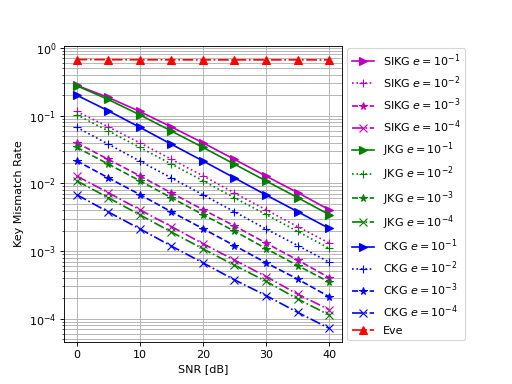

=== CSI error: 0.1 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== CSI error: 0.01 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== CSI error: 0.001 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== CSI error: 0.0001 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db


In [2]:
## Chapter 3. KMR

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)

def plot_subcarriers(H, NullCarriers):
    plt.plot(np.concatenate(
        (np.zeros(NullCarriers[0]), np.abs(H), np.zeros(NullCarriers[1]))
    ))
    
def index_to_bits1(ind1, ind2):
    if (ind1, ind2) == (0, 0) or (ind1, ind2) == (0, 1):
        return [1, 0, 1, 0]
    elif (ind1, ind2) == (0, 2) or (ind1, ind2) == (0, 3):
        return [0, 1, 0, 1]
    elif (ind1, ind2) == (1, 0) or (ind1, ind2) == (2, 0):
        return [1, 1, 0, 1]
    elif (ind1, ind2) == (1, 1) or (ind1, ind2) == (1, 2):
        return [1, 0, 1, 1]
    elif (ind1, ind2) == (1, 3) or (ind1, ind2) == (2, 3):
        return [0, 0, 1, 0]
    elif (ind1, ind2) == (2, 1) or (ind1, ind2) == (2, 2):
        return [1, 0, 0, 0]
    elif (ind1, ind2) == (3, 0) or (ind1, ind2) == (3, 1):
        return [1, 0, 0, 1]
    return [0, 1, 1, 0]

def index_to_bits(ind1, ind2):
    if (ind1, ind2) == (0, 0) or (ind1, ind2) == (0, 1) or (ind1, ind2) == (1, 0) or (ind1, ind2) == (1, 1):
        return [1, 0, 1, 0]
    elif (ind1, ind2) == (2, 0) or (ind1, ind2) == (2, 1) or (ind1, ind2) == (3, 0) or (ind1, ind2) == (3, 1):
        return [0, 1, 1, 0]
    elif (ind1, ind2) == (0, 2) or (ind1, ind2) == (0, 3) or (ind1, ind2) == (1, 2) or (ind1, ind2) == (1, 3):
        return [1, 0, 0, 1]
    return [0, 1, 0, 1]

## NIAKG lookup table. Stupid and shitty codes ...
def niakg_to_bits(m, inds):
    if m == 1 and inds == [0]:
        return [0, 0, 0, 1]
    elif m == 1 and inds == [1]:
        return [0, 0, 1, 0]
    elif m == 1 and inds == [2]:
        return [0, 0, 1, 1]
    elif m == 1 and inds == [3]:
        return [0, 1, 0, 0]
    elif m == 2 and inds == [0, 1]:
        return [0, 1, 0, 1]
    elif m == 2 and inds == [0, 2]:
        return [0, 1, 1, 0]
    elif m == 2 and inds == [0, 3]:
        return [0, 1, 1, 1]
    elif m == 2 and inds == [1, 2]:
        return [1, 0, 0, 0]
    elif m == 2 and inds == [1, 3]:
        return [1, 0, 0, 1]
    elif m == 2 and inds == [2, 3]:
        return [1, 0, 1, 0]
    elif m == 3 and inds == [0, 1, 2]:
        return [1, 0, 1, 1]
    elif m == 3 and inds == [0, 1, 3]:
        return [1, 1, 0, 0]
    elif m == 3 and inds == [0, 2, 3]:
        return [1, 1, 0, 1]
    else:
        return [1, 1, 1, 0]

M = 4         ## M-ary modulation size
N = 64        ## Number of sub-carriers
K = 1         ## Number of active sub-carriers
NPkt = 100000   ## Number of transmission packets.

KGR_k1_mmse = []
KMR_k1_mmse = []
KGR_k2_mmse = []
KMR_k2_mmse = []
KGR_JKG_mmse = []
KMR_JKG_mmse = []
KGR_NIAKG_mmse = []
KMR_NIAKG_mmse = []

eve_corr = 0.01
KGR_EVE_mmse = []
KMR_EVE_mmse = []

## Iterate over MMSEs
for MMSE in [10.0, 100.0, 1000.0, 10000.0]:
    print('=== CSI error: {} ==='.format(1 / MMSE))
    PERMUTE = np.random.permutation(4) ## Random Interleaver
    NChCoeff = 2                       ## Number of channel coefficient (Rayleigh channel).

    EbN0S = [0, 5, 10, 15, 20, 25, 30, 35, 40]

    KGRs_k1 = []
    KMRs_k1 = []
    KLRs_k1 = []

    KGRs_k2 = []
    KMRs_k2 = []
    KLRs_k2 = []

    KGRs_JKG = []
    KMRs_JKG = []
    KLRs_JKG = []

    KGRs_NIAKG = []
    KMRs_NIAKG = []
    KLRs_NIAKG = []

    KGRs_EVE = []
    KMRs_EVE = []
    KLRs_EVE = []

    ## for EbN0 in range(0, 45, 5):
    for EbN0 in EbN0S:
        print('SNR(db) is {} db'.format(EbN0))
        EsN0 = 10 ** (EbN0 / 10)
        sigma = np.sqrt(1 / EsN0) ## Additive noise variance.
        eps = 1 / (1 + MMSE * EsN0)

        ## Transmission over Rayleigh fading channel.
        noise = (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * np.random.randn(NPkt, N))

        ## Alice -> Bob.
        H1 = (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N))) * np.sqrt(1 - eps)
        e1 = (np.sqrt(eps) / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N)))
        Hab = H1 + e1

        ## Bob -> Alice.
        e2 = (np.sqrt(eps) / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N)))
        Hba = H1 + e2

        ## Alice -> Eve.
        Hae = eve_corr * H1 + (1 - eve_corr) * (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N))) * np.sqrt(1 - eps)

        KGR_k1 = 0.0
        KMR_k1 = 0.0
        KLR_k1 = 0.0

        KGR_k2 = 0.0
        KMR_k2 = 0.0
        KLR_k2 = 0.0
        
        KGR_JKG = 0.0
        KMR_JKG = 0.0
        KLR_JKG = 0.0

        KGR_NIAKG = 0.0
        KMR_NIAKG = 0.0
        KLR_NIAKG = 0.0

        KGR_EVE = 0.0
        KMR_EVE = 0.0
        KLR_EVE = 0.0

        for PktIndex in range(NPkt):
            for G in range(0, N, 4):
                ## Apply random interlevaer to each block.
                subcarrier_blk_ab = Hab[PktIndex][G:G+4][PERMUTE]
                subcarrier_blk_ba = Hba[PktIndex][G:G+4][PERMUTE]
                subcarrier_blk_ae = Hae[PktIndex][G:G+4][PERMUTE]

                subcarrier_blk_amp_ab = np.abs(subcarrier_blk_ab)
                subcarrier_blk_amp_ba = np.abs(subcarrier_blk_ba)
                subcarrier_blk_amp_ae = np.abs(subcarrier_blk_ae)

                avg_ab = np.average(subcarrier_blk_amp_ab)
                avg_ba = np.average(subcarrier_blk_amp_ba)
                avg_ae = np.average(subcarrier_blk_amp_ae)

                k1_ab = [1 if x > avg_ab else 0 for x in subcarrier_blk_amp_ab]
                k1_ba = [1 if x > avg_ba else 0 for x in subcarrier_blk_amp_ba]
                k1_ae = [1 if x > avg_ae else 0 for x in subcarrier_blk_amp_ae]

                ## Improved Index based algos.
                max_diff_ab = 0.0
                max_diff_ba = 0.0
                max_diff_ae = 0.0
                max_pos_ab = -1
                max_pos_ba = -1
                max_pos_ae = -1

                min_diff_ab = 9999.0
                min_diff_ba = 9999.0
                min_diff_ae = 9999.0
                min_pos_ab = -1
                min_pos_ba = -1
                min_pos_ae = -1

                for b in range(4):
                    if np.abs(subcarrier_blk_amp_ab[b] - avg_ab) > max_diff_ab:
                        max_diff_ab = np.abs(subcarrier_blk_amp_ab[b] - avg_ab)
                        max_pos_ab = b
                    if np.abs(subcarrier_blk_amp_ba[b] - avg_ba) > max_diff_ba:
                        max_diff_ba = np.abs(subcarrier_blk_amp_ba[b] - avg_ba)
                        max_pos_ba = b
                    if np.abs(subcarrier_blk_amp_ae[b] - avg_ae) > max_diff_ae:
                        max_diff_ae = np.abs(subcarrier_blk_amp_ae[b] - avg_ae)
                        max_pos_ae = b
                    if np.abs(subcarrier_blk_amp_ab[b] - avg_ab) < min_diff_ab:
                        min_diff_ab = np.abs(subcarrier_blk_amp_ab[b] - avg_ab)
                        min_pos_ab = b
                    if np.abs(subcarrier_blk_amp_ba[b] - avg_ba) < min_diff_ba:
                        min_diff_ba = np.abs(subcarrier_blk_amp_ba[b] - avg_ba)
                        min_pos_ba = b
                    if np.abs(subcarrier_blk_amp_ae[b] - avg_ae) < min_diff_ae:
                        min_diff_ae = np.abs(subcarrier_blk_amp_ae[b] - avg_ae)
                        min_pos_ae = b

                k2_ab = np.concatenate((index_to_bits(max_pos_ab, min_pos_ab), []))
                k2_ba = np.concatenate((index_to_bits(max_pos_ba, min_pos_ba), []))
                k2_ae = np.concatenate((index_to_bits(max_pos_ae, min_pos_ae), []))

                for b in range(len(k1_ab)):
                    if k1_ab[b] == k1_ba[b]:
                        KGR_k1 += 1
                        KGR_k2 += 1
                        KGR_JKG += 1
                        KGR_NIAKG += 1
                    else:
                        KMR_k1 += 1
                        KMR_k2 += 1
                        KMR_JKG += 1
                        KMR_NIAKG += 1

                    if k2_ab[b] == k2_ba[b]:
                        KGR_k2 += 1
                    else:
                        KMR_k2 += 1
                        
                    if k1_ae[b] == k1_ab[b] and k1_ae[b] == k1_ba[b]:
                        KGR_EVE += 1
                    else:
                        KMR_EVE += 1
                    if k2_ae[b] == k2_ab[b] and k2_ae[b] == k2_ba[b]:
                        KGR_EVE += 1
                    else:
                        KMR_EVE += 1

                ## JKG algo.
                first_max_ind_ab = -1
                second_max_ind_ab = -1
                first_max_ind_ba = -1
                second_max_ind_ba = -1
                for b in range(4):
                    if b == 0:
                        first_max_ind_ab = 0
                        first_max_ind_ba = 0
                    else:
                        if subcarrier_blk_amp_ab[b] > subcarrier_blk_amp_ab[first_max_ind_ab]:
                            second_max_ind_ab = first_max_ind_ab
                            first_max_ind_ab = b
                        elif second_max_ind_ab == -1 or \
                            subcarrier_blk_amp_ab[b] > subcarrier_blk_amp_ab[second_max_ind_ab]:
                            second_max_ind_ab = b
                        if subcarrier_blk_amp_ba[b] > subcarrier_blk_amp_ba[first_max_ind_ba]:
                            second_max_ind_ba = first_max_ind_ba
                            first_max_ind_ba = b
                        elif second_max_ind_ba == -1 or \
                            subcarrier_blk_amp_ba[b] > subcarrier_blk_amp_ba[second_max_ind_ba]:
                            second_max_ind_ba = b
                if first_max_ind_ab == first_max_ind_ba:
                    KGR_JKG += 1
                else:
                    KMR_JKG += 1
                if second_max_ind_ab == second_max_ind_ba:
                    KGR_JKG += 1
                else:
                    KMR_JKG += 1
                    
                ## NIAKG algo.
                over_avg_ind_ab = []
                over_avg_ind_ba = []
                m_over_avg_ab = 0
                m_over_avg_ba = 0
                for b in range(4):
                    if subcarrier_blk_amp_ab[b] > avg_ab:
                        m_over_avg_ab += 1
                        over_avg_ind_ab.append(b)
                    if subcarrier_blk_amp_ba[b] > avg_ba:
                        m_over_avg_ab += 1
                        over_avg_ind_ab.append(b)
                niakg_ab = niakg_to_bits(m_over_avg_ab, over_avg_ind_ab)
                niakg_ba = niakg_to_bits(m_over_avg_ba, over_avg_ind_ba)
                for b in range(4):
                    if niakg_ab[b] == niakg_ba[b]:
                        KGR_NIAKG += 1
                    else:
                        KMR_NIAKG += 1

        KGR_k1 = KGR_k1 / NPkt / 64.0
        KMR_k1 = KMR_k1 / NPkt / 64.0

        KGR_k2 = KGR_k2 / NPkt / 64.0
        KMR_k2 = KMR_k2 / NPkt / 64.0
        
        KGR_JKG = KGR_JKG / NPkt / 64.0
        KMR_JKG = KMR_JKG / NPkt / 64.0
        
        KGR_NIAKG = KGR_NIAKG / NPkt / 64.0
        KMR_NIAKG = KMR_NIAKG / NPkt / 64.0
        
        KGR_EVE = KGR_EVE / NPkt / 64.0 / 4.0
        KMR_EVE = KMR_EVE / NPkt / 64.0 / 1.5

        # print('KGR k1: {} KMR k1: {}'.format(KGR_k1, KMR_k1))
        # print('KGR k2: {} KMR k2: {}'.format(KGR_k2, KMR_k2))

        KGRs_k1.append(KGR_k1)
        KMRs_k1.append(KMR_k1)
        KGRs_k2.append(KGR_k2 / 2.0)
        KMRs_k2.append(KMR_k2 / 2.0)
        KGRs_JKG.append(KGR_JKG / 1.5)
        KMRs_JKG.append(KMR_JKG / 1.5)
        KGRs_NIAKG.append(KGR_NIAKG)
        KMRs_NIAKG.append(KMR_NIAKG)
        KGRs_EVE.append(KGR_EVE)
        KMRs_EVE.append(KMR_EVE)

    KGR_k1_mmse.append(KGRs_k1)
    KMR_k1_mmse.append(KMRs_k1)
    KGR_k2_mmse.append(KGRs_k2)
    KMR_k2_mmse.append(KMRs_k2)
    KGR_JKG_mmse.append(KGRs_JKG)
    KMR_JKG_mmse.append(KMRs_JKG)
    KGR_NIAKG_mmse.append(KGRs_NIAKG)
    KMR_NIAKG_mmse.append(KMRs_NIAKG)
    KGR_EVE_mmse.append(KGRs_EVE)
    KMR_EVE_mmse.append(KMRs_EVE)

## MMSE 0.001
ax.semilogy(EbN0S, KMR_k1_mmse[0], color='b', marker='>', linestyle='solid', markersize=7, label=r'CKG $ e=10^{-1} $')
ax.semilogy(EbN0S, KMR_k2_mmse[0], color='m', marker='>', linestyle='solid', markersize=7, label=r'SIKG $ e=10^{-1} $')
# JKG ## From: FURQAN et al.: NEW PHYSICAL LAYER KEY GENERATION DIMENSIONS: SUBCARRIER INDICES/POSITIONS
ax.semilogy(EbN0S, KMR_JKG_mmse[0], color='g', marker='>', linestyle='solid', markersize=7, label=r'JKG $ e=10^{-1} $')
# NIAKG
# ax.plot(EbN0S, KGR_NIAKG_mmse[0], color='c', marker='>', linestyle='solid', markersize=7, label=r'NIAKG $ e=10^{-1} $')

## MMSE 0.01
ax.semilogy(EbN0S, KMR_k1_mmse[1], color='b', marker='+', linestyle='dotted', markersize=7, label=r'CKG $ e=10^{-2} $')
ax.semilogy(EbN0S, KMR_k2_mmse[1], color='m', marker='+', linestyle='dotted', markersize=7, label=r'SIKG $ e=10^{-2} $')
ax.semilogy(EbN0S, KMR_JKG_mmse[1], color='g', marker='+', linestyle='dotted', markersize=7, label=r'JKG $ e=10^{-2} $')
# ax.plot(EbN0S, KGR_NIAKG_mmse[1], color='c', marker='+', linestyle='dotted', markersize=7, label=r'NIAKG $ e=10^{-2} $')

## MMSE 0.1
ax.semilogy(EbN0S, KMR_k1_mmse[2], color='b', marker='*', linestyle='dashed', markersize=7, label=r'CKG $ e=10^{-3} $')
ax.semilogy(EbN0S, KMR_k2_mmse[2], color='m', marker='*', linestyle='dashed', markersize=7, label=r'SIKG $ e=10^{-3} $')
ax.semilogy(EbN0S, KMR_JKG_mmse[2], color='g', marker='*', linestyle='dashed', markersize=7, label=r'JKG $ e=10^{-3} $')
# ax.plot(EbN0S, KGR_NIAKG_mmse[2], color='c', marker='*', linestyle='dashed', markersize=7, label=r'NIAKG $ e=10^{-3} $')

## MMSE 1
ax.semilogy(EbN0S, KMR_k1_mmse[3], color='b', marker='x', linestyle='dashdot', markersize=7, label=r'CKG $ e=10^{-4} $')
ax.semilogy(EbN0S, KMR_k2_mmse[3], color='m', marker='x', linestyle='dashdot', markersize=7, label=r'SIKG $ e=10^{-4} $')
ax.semilogy(EbN0S, KMR_JKG_mmse[3], color='g', marker='x', linestyle='dashdot', markersize=7, label=r'JKG $ e=10^{-4} $')
# ax.plot(EbN0S, KGR_NIAKG_mmse[3], color='c', marker='x', linestyle='dashdot', markersize=7, label=r'NIAKG $ e=10^{-4} $')

ax.semilogy(EbN0S, KMR_EVE_mmse[3], color='r', marker='^', linestyle='dashdot', markersize=7, label=r'Eve')

ax.set_ylabel('Key Mismatch Rate')
ax.set_xlabel('SNR [dB]')
ax.grid(True, which='both')

## Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
# Put a legend to the right of the current axis
handles, labels = plt.gca().get_legend_handles_labels()
##                                                               Eve
order = [1, 4, 7, 10, 2, 5, 8, 11, 0, 3, 6, 9,   12]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./kmr.png')

<IPython.core.display.Javascript object>


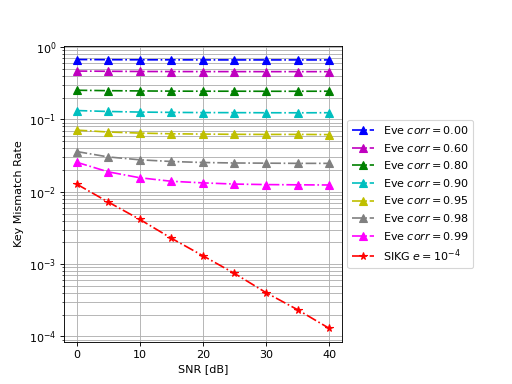

=== Eve correlation: 0.0 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== Eve correlation: 0.6 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== Eve correlation: 0.8 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== Eve correlation: 0.9 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== Eve correlation: 0.95 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR(db) is 20 db
SNR(db) is 25 db
SNR(db) is 30 db
SNR(db) is 35 db
SNR(db) is 40 db
=== Eve correlation: 0.98 ===
SNR(db) is 0 db
SNR(db) is 5 db
SNR(db) is 10 db
SNR(db) is 15 db
SNR

In [3]:
## Chapter 3. KBR.

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)

def plot_subcarriers(H, NullCarriers):
    plt.plot(np.concatenate(
        (np.zeros(NullCarriers[0]), np.abs(H), np.zeros(NullCarriers[1]))
    ))

def index_to_bits1(ind1, ind2):
    if (ind1, ind2) == (0, 0) or (ind1, ind2) == (0, 1):
        return [1, 0, 1, 0]
    elif (ind1, ind2) == (0, 2) or (ind1, ind2) == (0, 3):
        return [0, 1, 0, 1]
    elif (ind1, ind2) == (1, 0) or (ind1, ind2) == (2, 0):
        return [1, 1, 0, 1]
    elif (ind1, ind2) == (1, 1) or (ind1, ind2) == (1, 2):
        return [1, 0, 1, 1]
    elif (ind1, ind2) == (1, 3) or (ind1, ind2) == (2, 3):
        return [0, 0, 1, 0]
    elif (ind1, ind2) == (2, 1) or (ind1, ind2) == (2, 2):
        return [1, 0, 0, 0]
    elif (ind1, ind2) == (3, 0) or (ind1, ind2) == (3, 1):
        return [1, 0, 0, 1]
    return [0, 1, 1, 0]

def index_to_bits(ind1, ind2):
    if (ind1, ind2) == (0, 0) or (ind1, ind2) == (0, 1) or (ind1, ind2) == (1, 0) or (ind1, ind2) == (1, 1):
        return [1, 0, 1, 0]
    elif (ind1, ind2) == (2, 0) or (ind1, ind2) == (2, 1) or (ind1, ind2) == (3, 0) or (ind1, ind2) == (3, 1):
        return [0, 1, 1, 0]
    elif (ind1, ind2) == (0, 2) or (ind1, ind2) == (0, 3) or (ind1, ind2) == (1, 2) or (ind1, ind2) == (1, 3):
        return [1, 0, 0, 1]
    return [0, 1, 0, 1]

## NIAKG lookup table. Stupid and shitty codes ...
def niakg_to_bits(m, inds):
    if m == 1 and inds == [0]:
        return [0, 0, 0, 1]
    elif m == 1 and inds == [1]:
        return [0, 0, 1, 0]
    elif m == 1 and inds == [2]:
        return [0, 0, 1, 1]
    elif m == 1 and inds == [3]:
        return [0, 1, 0, 0]
    elif m == 2 and inds == [0, 1]:
        return [0, 1, 0, 1]
    elif m == 2 and inds == [0, 2]:
        return [0, 1, 1, 0]
    elif m == 2 and inds == [0, 3]:
        return [0, 1, 1, 1]
    elif m == 2 and inds == [1, 2]:
        return [1, 0, 0, 0]
    elif m == 2 and inds == [1, 3]:
        return [1, 0, 0, 1]
    elif m == 2 and inds == [2, 3]:
        return [1, 0, 1, 0]
    elif m == 3 and inds == [0, 1, 2]:
        return [1, 0, 1, 1]
    elif m == 3 and inds == [0, 1, 3]:
        return [1, 1, 0, 0]
    elif m == 3 and inds == [0, 2, 3]:
        return [1, 1, 0, 1]
    else:
        return [1, 1, 1, 0]

M = 4         ## M-ary modulation size
N = 64        ## Number of sub-carriers
K = 1         ## Number of active sub-carriers
NPkt = 100000   ## Number of transmission packets.

KGR_k1_mmse = []
KMR_k1_mmse = []
KGR_k2_mmse = []
KMR_k2_mmse = []
KGR_JKG_mmse = []
KMR_JKG_mmse = []
KGR_NIAKG_mmse = []
KMR_NIAKG_mmse = []

eve_corr = 0.01
KGR_EVE_mmse = []
KMR_EVE_mmse = []

for eve_corr in [0.00, 0.60, 0.80, 0.90, 0.95, 0.98, 0.99]:
    MMSE = 10000.0
    print('=== Eve correlation: {} ==='.format(eve_corr))
    PERMUTE = np.random.permutation(4) ## Random Interleaver
    NChCoeff = 2                       ## Number of channel coefficient (Rayleigh channel).

    EbN0S = [0, 5, 10, 15, 20, 25, 30, 35, 40]

    KGRs_k1 = []
    KMRs_k1 = []
    KLRs_k1 = []

    KGRs_k2 = []
    KMRs_k2 = []
    KLRs_k2 = []

    KGRs_JKG = []
    KMRs_JKG = []
    KLRs_JKG = []

    KGRs_NIAKG = []
    KMRs_NIAKG = []
    KLRs_NIAKG = []

    KGRs_EVE = []
    KMRs_EVE = []
    KLRs_EVE = []

    ## for EbN0 in range(0, 45, 5):
    for EbN0 in EbN0S:
        print('SNR(db) is {} db'.format(EbN0))
        EsN0 = 10 ** (EbN0 / 10)
        sigma = np.sqrt(1 / EsN0) ## Additive noise variance.
        eps = 1 / (1 + MMSE * EsN0)

        ## Transmission over Rayleigh fading channel.
        noise = (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * np.random.randn(NPkt, N))

        ## Alice -> Bob.
        H1 = (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N))) * np.sqrt(1 - eps)
        e1 = (np.sqrt(eps) / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N)))
        Hab = H1 + e1

        ## Bob -> Alice.
        e2 = (np.sqrt(eps) / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N)))
        Hba = H1 + e2

        ## Alice -> Eve.
        Hae = eve_corr * H1 + (1 - eve_corr) * (1 / np.sqrt(2)) * (np.random.randn(NPkt, N) + 1j * (np.random.randn(NPkt, N))) * np.sqrt(1 - eps)

        KGR_k1 = 0.0
        KMR_k1 = 0.0
        KLR_k1 = 0.0

        KGR_k2 = 0.0
        KMR_k2 = 0.0
        KLR_k2 = 0.0
        
        KGR_JKG = 0.0
        KMR_JKG = 0.0
        KLR_JKG = 0.0

        KGR_NIAKG = 0.0
        KMR_NIAKG = 0.0
        KLR_NIAKG = 0.0

        KGR_EVE = 0.0
        KMR_EVE = 0.0
        KLR_EVE = 0.0

        for PktIndex in range(NPkt):
            for G in range(0, N, 4):
                ## Apply random interlevaer to each block.
                subcarrier_blk_ab = Hab[PktIndex][G:G+4][PERMUTE]
                subcarrier_blk_ba = Hba[PktIndex][G:G+4][PERMUTE]
                subcarrier_blk_ae = Hae[PktIndex][G:G+4][PERMUTE]

                subcarrier_blk_amp_ab = np.abs(subcarrier_blk_ab)
                subcarrier_blk_amp_ba = np.abs(subcarrier_blk_ba)
                subcarrier_blk_amp_ae = np.abs(subcarrier_blk_ae)

                avg_ab = np.average(subcarrier_blk_amp_ab)
                avg_ba = np.average(subcarrier_blk_amp_ba)
                avg_ae = np.average(subcarrier_blk_amp_ae)

                k1_ab = [1 if x > avg_ab else 0 for x in subcarrier_blk_amp_ab]
                k1_ba = [1 if x > avg_ba else 0 for x in subcarrier_blk_amp_ba]
                k1_ae = [1 if x > avg_ae else 0 for x in subcarrier_blk_amp_ae]

                ## Improved Index based algos.
                max_diff_ab = 0.0
                max_diff_ba = 0.0
                max_diff_ae = 0.0
                max_pos_ab = -1
                max_pos_ba = -1
                max_pos_ae = -1

                min_diff_ab = 9999.0
                min_diff_ba = 9999.0
                min_diff_ae = 9999.0
                min_pos_ab = -1
                min_pos_ba = -1
                min_pos_ae = -1

                for b in range(4):
                    if np.abs(subcarrier_blk_amp_ab[b] - avg_ab) > max_diff_ab:
                        max_diff_ab = np.abs(subcarrier_blk_amp_ab[b] - avg_ab)
                        max_pos_ab = b
                    if np.abs(subcarrier_blk_amp_ba[b] - avg_ba) > max_diff_ba:
                        max_diff_ba = np.abs(subcarrier_blk_amp_ba[b] - avg_ba)
                        max_pos_ba = b
                    if np.abs(subcarrier_blk_amp_ae[b] - avg_ae) > max_diff_ae:
                        max_diff_ae = np.abs(subcarrier_blk_amp_ae[b] - avg_ae)
                        max_pos_ae = b
                    if np.abs(subcarrier_blk_amp_ab[b] - avg_ab) < min_diff_ab:
                        min_diff_ab = np.abs(subcarrier_blk_amp_ab[b] - avg_ab)
                        min_pos_ab = b
                    if np.abs(subcarrier_blk_amp_ba[b] - avg_ba) < min_diff_ba:
                        min_diff_ba = np.abs(subcarrier_blk_amp_ba[b] - avg_ba)
                        min_pos_ba = b
                    if np.abs(subcarrier_blk_amp_ae[b] - avg_ae) < min_diff_ae:
                        min_diff_ae = np.abs(subcarrier_blk_amp_ae[b] - avg_ae)
                        min_pos_ae = b

                k2_ab = np.concatenate((index_to_bits(max_pos_ab, min_pos_ab), []))
                k2_ba = np.concatenate((index_to_bits(max_pos_ba, min_pos_ba), []))
                k2_ae = np.concatenate((index_to_bits(max_pos_ae, min_pos_ae), []))

                for b in range(len(k1_ab)):
                    if k1_ab[b] == k1_ba[b]:
                        KGR_k1 += 1
                        KGR_k2 += 1
                        KGR_JKG += 1
                        KGR_NIAKG += 1
                    else:
                        KMR_k1 += 1
                        KMR_k2 += 1
                        KMR_JKG += 1
                        KMR_NIAKG += 1

                    if k2_ab[b] == k2_ba[b]:
                        KGR_k2 += 1
                    else:
                        KMR_k2 += 1
                        
                    if k1_ae[b] == k1_ab[b] and k1_ae[b] == k1_ba[b]:
                        KGR_EVE += 1
                    else:
                        KMR_EVE += 1
                    if k2_ae[b] == k2_ab[b] and k2_ae[b] == k2_ba[b]:
                        KGR_EVE += 1
                    else:
                        KMR_EVE += 1

                ## JKG algo.
                first_max_ind_ab = -1
                second_max_ind_ab = -1
                first_max_ind_ba = -1
                second_max_ind_ba = -1
                for b in range(4):
                    if b == 0:
                        first_max_ind_ab = 0
                        first_max_ind_ba = 0
                    else:
                        if subcarrier_blk_amp_ab[b] > subcarrier_blk_amp_ab[first_max_ind_ab]:
                            second_max_ind_ab = first_max_ind_ab
                            first_max_ind_ab = b
                        elif second_max_ind_ab == -1 or \
                            subcarrier_blk_amp_ab[b] > subcarrier_blk_amp_ab[second_max_ind_ab]:
                            second_max_ind_ab = b
                        if subcarrier_blk_amp_ba[b] > subcarrier_blk_amp_ba[first_max_ind_ba]:
                            second_max_ind_ba = first_max_ind_ba
                            first_max_ind_ba = b
                        elif second_max_ind_ba == -1 or \
                            subcarrier_blk_amp_ba[b] > subcarrier_blk_amp_ba[second_max_ind_ba]:
                            second_max_ind_ba = b
                if first_max_ind_ab == first_max_ind_ba:
                    KGR_JKG += 1
                else:
                    KMR_JKG += 1
                if second_max_ind_ab == second_max_ind_ba:
                    KGR_JKG += 1
                else:
                    KMR_JKG += 1
                    
                ## NIAKG algo.
                over_avg_ind_ab = []
                over_avg_ind_ba = []
                m_over_avg_ab = 0
                m_over_avg_ba = 0
                for b in range(4):
                    if subcarrier_blk_amp_ab[b] > avg_ab:
                        m_over_avg_ab += 1
                        over_avg_ind_ab.append(b)
                    if subcarrier_blk_amp_ba[b] > avg_ba:
                        m_over_avg_ab += 1
                        over_avg_ind_ab.append(b)
                niakg_ab = niakg_to_bits(m_over_avg_ab, over_avg_ind_ab)
                niakg_ba = niakg_to_bits(m_over_avg_ba, over_avg_ind_ba)
                for b in range(4):
                    if niakg_ab[b] == niakg_ba[b]:
                        KGR_NIAKG += 1
                    else:
                        KMR_NIAKG += 1

        KGR_k1 = KGR_k1 / NPkt / 64.0
        KMR_k1 = KMR_k1 / NPkt / 64.0

        KGR_k2 = KGR_k2 / NPkt / 64.0
        KMR_k2 = KMR_k2 / NPkt / 64.0 / 2.0
        
        KGR_JKG = KGR_JKG / NPkt / 64.0
        KMR_JKG = KMR_JKG / NPkt / 64.0 / 1.5
        
        KGR_NIAKG = KGR_NIAKG / NPkt / 64.0
        KMR_NIAKG = KMR_NIAKG / NPkt / 64.0
        
        KGR_EVE = KGR_EVE / NPkt / 64.0 / 4.0
        KMR_EVE = KMR_EVE / NPkt / 64.0 / 1.5

        # print('KGR k1: {} KMR k1: {}'.format(KGR_k1, KMR_k1))
        # print('KGR k2: {} KMR k2: {}'.format(KGR_k2, KMR_k2))

        KGRs_k1.append(KGR_k1)
        KMRs_k1.append(KMR_k1)
        KGRs_k2.append(KGR_k2)
        KMRs_k2.append(KMR_k2)
        KGRs_JKG.append(KGR_JKG)
        KMRs_JKG.append(KMR_JKG)
        KGRs_NIAKG.append(KGR_NIAKG)
        KMRs_NIAKG.append(KMR_NIAKG)
        KGRs_EVE.append(KGR_EVE)
        KMRs_EVE.append(KMR_EVE)

    KGR_k1_mmse.append(KGRs_k1)
    KMR_k1_mmse.append(KMRs_k1)
    KGR_k2_mmse.append(KGRs_k2)
    KMR_k2_mmse.append(KMRs_k2)
    KGR_JKG_mmse.append(KGRs_JKG)
    KMR_JKG_mmse.append(KMRs_JKG)
    KGR_NIAKG_mmse.append(KGRs_NIAKG)
    KMR_NIAKG_mmse.append(KMRs_NIAKG)
    KGR_EVE_mmse.append(KGRs_EVE)
    KMR_EVE_mmse.append(KMRs_EVE)

## MMSE 0.001
ax.semilogy(EbN0S, KMR_EVE_mmse[0], color='b', marker='^', linestyle='dashdot', markersize=7, label=r'Eve $ corr=0.00 $')
ax.semilogy(EbN0S, KMR_EVE_mmse[1], color='m', marker='^', linestyle='dashdot', markersize=7, label=r'Eve $ corr=0.60 $')
ax.semilogy(EbN0S, KMR_EVE_mmse[2], color='g', marker='^', linestyle='dashdot', markersize=7, label=r'Eve $ corr=0.80 $')
ax.semilogy(EbN0S, KMR_EVE_mmse[3], color='c', marker='^', linestyle='dashdot', markersize=7, label=r'Eve $ corr=0.90 $')
ax.semilogy(EbN0S, KMR_EVE_mmse[4], color='y', marker='^', linestyle='dashdot', markersize=7, label=r'Eve $ corr=0.95 $')
ax.semilogy(EbN0S, KMR_EVE_mmse[5], color='grey', marker='^', linestyle='dashdot', markersize=7, label=r'Eve $ corr=0.98 $')
ax.semilogy(EbN0S, KMR_EVE_mmse[6], color='fuchsia', marker='^', linestyle='dashdot', markersize=7, label=r'Eve $ corr=0.99 $')
ax.semilogy(EbN0S, KMR_k2_mmse[0], color='r', marker='*', linestyle='dashdot', markersize=7, label=r'SIKG $ e=10^{-4} $')

ax.set_ylabel('Key Mismatch Rate')
ax.set_xlabel('SNR [dB]')
ax.grid(True, which='both')

## Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
# Put a legend to the right of the current axis
handles, labels = plt.gca().get_legend_handles_labels()
##                                                               Eve
order = [0, 1, 2, 3, 4, 5, 6, 7]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('./kbr.png')

<IPython.core.display.Javascript object>


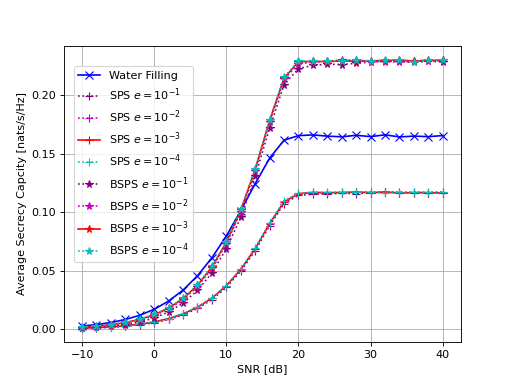

=== Water filling, SNR: -10 ===
=== Water filling, SNR: -8 ===
=== Water filling, SNR: -6 ===
=== Water filling, SNR: -4 ===
=== Water filling, SNR: -2 ===
=== Water filling, SNR: 0 ===
=== Water filling, SNR: 2 ===
=== Water filling, SNR: 4 ===
=== Water filling, SNR: 6 ===
=== Water filling, SNR: 8 ===
=== Water filling, SNR: 10 ===
=== Water filling, SNR: 12 ===
=== Water filling, SNR: 14 ===
=== Water filling, SNR: 16 ===
=== Water filling, SNR: 18 ===
=== Water filling, SNR: 20 ===
=== Water filling, SNR: 22 ===
=== Water filling, SNR: 24 ===
=== Water filling, SNR: 26 ===
=== Water filling, SNR: 28 ===
=== Water filling, SNR: 30 ===
=== Water filling, SNR: 32 ===
=== Water filling, SNR: 34 ===
=== Water filling, SNR: 36 ===
=== Water filling, SNR: 38 ===
=== Water filling, SNR: 40 ===
=== SNR: -10 ===
=== SNR: -8 ===
=== SNR: -6 ===
=== SNR: -4 ===
=== SNR: -2 ===
=== SNR: 0 ===
=== SNR: 2 ===
=== SNR: 4 ===
=== SNR: 6 ===
=== SNR: 8 ===
=== SNR: 10 ===
=== SNR: 12 ===
=== SNR: 1

In [1]:
## Chapter 4. Secrecy capacity. (Fig 1.)
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)

Nc1 = 64       ## Number of subcarriers
Nc = 64
N0 = 1        ## WTF? I just copied-and-pasted from web.
Npkt = 10000 ## Let's simulate 10000 packets.
G = 4         ## Block size.

water_filling_rates = []
SNRs = [x for x in range(-10, 42, 2)]

def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

## Water filling.
for SNR in SNRs:
    ## Water filling algo.
    water_filling_rates_avg_rate = 0.0
    print('=== Water filling, SNR: {} ==='.format(SNR))
    for i in range(Npkt):
        P = 10 ** (SNR / 10)
        g1 = np.abs(np.random.randn(Nc1, 1))
        g2 = np.abs(np.random.randn(Nc1, 1))

        alpha_low = min(N0/g1)                # Initial low
        alpha_high = (P + np.sum(N0/g1)) / Nc1 # Initial high

        stop_threshold = 1e-5 # Stop threshold

        # Iterate while low/high bounds are further than stop_threshold
        while(np.abs(alpha_low - alpha_high) > stop_threshold):
            alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

            # Solve the power allocation
            p = 1/alpha - N0/g1
            p[p < 0] = 0

            # Test sum-power constraints
            if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                alpha_low = alpha
            else: # Less than power limit => increase the lower bound
                alpha_high = alpha

        ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
        water_filling_achievable_rate = np.sum(np.log((1 + g1 * p / N0) / (1 + g2 * p / N0)))
        water_filling_rates_avg_rate += water_filling_achievable_rate
    water_filling_rates.append(water_filling_rates_avg_rate / Npkt)

## SPS-1 algo.
sps1_rates = []

for MMSE in [10, 100, 1000, 10000]:
    sps1_rates_snr = []
    for SNR in SNRs:
        water_filling_rates_avg_rate = 0.0
        print('=== SNR: {} ==='.format(SNR))
        for i in range(Npkt):
            P = 10 ** (SNR / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            eps = 1 / (1 + MMSE * P)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

            H2 = np.random.randn(1, Nc)
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2

            Inda = np.argsort(Ha)
            Indb = np.argsort(Hb)
            Inde = np.argsort(He)

            seta = set(Inda[0][:32])
            setb = set(Indb[0][:32])
            sete = set(Inde[0][:32])

            lenab = len(seta & setb)
            lenae = len(seta & sete)


            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc)) / (1 + (g2 * p / N0) * (lenae / Nc))))
            water_filling_rates_avg_rate += water_filling_achievable_rate
        sps1_rates_snr.append(water_filling_rates_avg_rate / Npkt)
    sps1_rates.append(sps1_rates_snr)

## SSPS. algo.
ssps_rates = []
G = 4
for MMSE in [10, 100, 1000, 10000]:
    ssps_rates_snr = []
    for SNR in SNRs:
        water_filling_rates_avg_rate = 0.0
        print('=== SNR: {} ==='.format(SNR))
        for i in range(Npkt):
            P = 10 ** (SNR / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            eps = 1 / (1 + MMSE * P)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

            H2 = np.random.randn(1, Nc)
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2
            
            lenab = 0
            lenae = 0

            for I in range(int(Nc / G)):
                ha = Ha[0][G * I : G * I + G]
                hb = Hb[0][G * I : G * I + G]
                he = He[0][G * I : G * I + G]

                inda = np.argsort(ha)
                indb = np.argsort(hb)
                inde = np.argsort(he)

                for II in range(G):
                    if inda[II] == indb[II]:
                        lenab += 1
                    if inda[II] == inde[II]:
                        lenae += 1

            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc)) / (1 + (g2 * p / N0) * (lenae / Nc))))
            water_filling_rates_avg_rate += water_filling_achievable_rate
        ssps_rates_snr.append(water_filling_rates_avg_rate / Npkt)
    ssps_rates.append(ssps_rates_snr)

## Water filling Baseline
ax.plot(SNRs, np.array(water_filling_rates) / Nc, color='b', marker='x', linestyle='solid', markersize=7, label=r'Water Filling')

## SPS.
ax.plot(SNRs, np.array(sps1_rates[0]) / 2 / Nc, color='purple', marker='+', linestyle='dotted', markersize=7, label=r'SPS $ e=10^{-1} $')
ax.plot(SNRs, np.array(sps1_rates[1]) / 2 / Nc, color='m', marker='+', linestyle='dotted', markersize=7, label=r'SPS $ e=10^{-2} $')
ax.plot(SNRs, np.array(sps1_rates[2]) / 2 / Nc, color='r', marker='+', linestyle='solid', markersize=7, label=r'SPS $ e=10^{-3} $')
ax.plot(SNRs, np.array(sps1_rates[3]) / 2 / Nc, color='c', marker='+', linestyle='dotted', markersize=7, label=r'SPS $ e=10^{-4} $')

## SPSS.
ax.plot(SNRs, np.array(ssps_rates[0]) / 2 / Nc, color='purple', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ e=10^{-1} $')
ax.plot(SNRs, np.array(ssps_rates[1]) / 2 / Nc, color='m', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ e=10^{-2} $')
ax.plot(SNRs, np.array(ssps_rates[2]) / 2 / Nc, color='r', marker='*', linestyle='solid', markersize=7, label=r'BSPS $ e=10^{-3} $')
ax.plot(SNRs, np.array(ssps_rates[3]) / 2 / Nc, color='c', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ e=10^{-4} $')

## Set position and blah blah ...
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(0.01, 0.6))

ax.set_ylabel('Average Secrecy Capcity [nats/s/Hz]')
ax.set_xlabel('SNR [dB]')
ax.grid(True, which='both')

plt.savefig('./4-1.png')

<IPython.core.display.Javascript object>


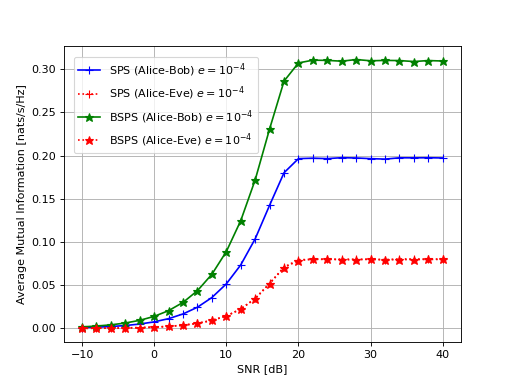

=== Water filling, SNR: -10 ===
=== Water filling, SNR: -8 ===
=== Water filling, SNR: -6 ===
=== Water filling, SNR: -4 ===
=== Water filling, SNR: -2 ===
=== Water filling, SNR: 0 ===
=== Water filling, SNR: 2 ===
=== Water filling, SNR: 4 ===
=== Water filling, SNR: 6 ===
=== Water filling, SNR: 8 ===
=== Water filling, SNR: 10 ===
=== Water filling, SNR: 12 ===
=== Water filling, SNR: 14 ===
=== Water filling, SNR: 16 ===
=== Water filling, SNR: 18 ===
=== Water filling, SNR: 20 ===
=== Water filling, SNR: 22 ===
=== Water filling, SNR: 24 ===
=== Water filling, SNR: 26 ===
=== Water filling, SNR: 28 ===
=== Water filling, SNR: 30 ===
=== Water filling, SNR: 32 ===
=== Water filling, SNR: 34 ===
=== Water filling, SNR: 36 ===
=== Water filling, SNR: 38 ===
=== Water filling, SNR: 40 ===
=== MMSE: 10000 SNR: -10 ===
=== MMSE: 10000 SNR: -8 ===
=== MMSE: 10000 SNR: -6 ===
=== MMSE: 10000 SNR: -4 ===
=== MMSE: 10000 SNR: -2 ===
=== MMSE: 10000 SNR: 0 ===
=== MMSE: 10000 SNR: 2 ===
===

In [2]:
## Chapter 4. Mutual Information. (Fig 1-2.)
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)

Nc1 = 64       ## Number of subcarriers
Nc = 64
N0 = 1        ## WTF? I just copied-and-pasted from web.
Npkt = 10000 ## Let's simulate 10000 packets.
G = 4         ## Block size.

legal_water_filling_rates = []
illegal_water_filling_rates = []

SNRs = [x for x in range(-10, 42, 2)]

def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

## Water filling.
for SNR in SNRs:
    ## Water filling algo.
    legal_water_filling_rates_avg_rate = 0.0
    illegal_water_filling_rates_avg_rate = 0.0
    print('=== Water filling, SNR: {} ==='.format(SNR))
    for i in range(Npkt):
        P = 10 ** (SNR / 10)
        g1 = np.abs(np.random.randn(Nc1, 1))
        g2 = np.abs(np.random.randn(Nc1, 1))

        alpha_low = min(N0/g1)                # Initial low
        alpha_high = (P + np.sum(N0/g1)) / Nc1 # Initial high

        stop_threshold = 1e-5 # Stop threshold

        # Iterate while low/high bounds are further than stop_threshold
        while(np.abs(alpha_low - alpha_high) > stop_threshold):
            alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

            # Solve the power allocation
            p = 1/alpha - N0/g1
            p[p < 0] = 0

            # Test sum-power constraints
            if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                alpha_low = alpha
            else: # Less than power limit => increase the lower bound
                alpha_high = alpha

        ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
        legal_water_filling_achievable_rate = np.sum(np.log((1 + g1 * p / N0)))
        illegal_water_filling_achievable_rate = np.sum(np.log((1 + g2 * p / N0)))
        legal_water_filling_rates_avg_rate += legal_water_filling_achievable_rate
        illegal_water_filling_rates_avg_rate += illegal_water_filling_achievable_rate
    legal_water_filling_rates.append(legal_water_filling_rates_avg_rate / Npkt)
    illegal_water_filling_rates.append(illegal_water_filling_rates_avg_rate / Npkt)

## SPS-1 algo.
legal_sps1_rates = []
illegal_sps1_rates = []

for MMSE in [10000]:
    legal_sps1_rates_snr = []
    illegal_sps1_rates_snr = []
    for SNR in SNRs:
        legal_water_filling_rates_avg_rate = 0.0
        illegal_water_filling_rates_avg_rate = 0.0
        print('=== MMSE: {} SNR: {} ==='.format(MMSE, SNR))
        for i in range(Npkt):
            P = 10 ** (SNR / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            eps = 1 / (1 + MMSE * P)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

            H2 = np.random.randn(1, Nc)
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2

            Inda = np.argsort(Ha)
            Indb = np.argsort(Hb)
            Inde = np.argsort(He)

            seta = set(Inda[0][:32])
            setb = set(Indb[0][:32])
            sete = set(Inde[0][:32])

            lenab = len(seta & setb)
            lenae = len(seta & sete)


            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            legal_water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc))))
            illegal_water_filling_achievable_rate = np.sum(np.log((1 + (g2 * p / N0) * (lenae / Nc))))
            legal_water_filling_rates_avg_rate += legal_water_filling_achievable_rate
            illegal_water_filling_rates_avg_rate += illegal_water_filling_achievable_rate
        legal_sps1_rates_snr.append(legal_water_filling_rates_avg_rate / Npkt)
        illegal_sps1_rates_snr.append(illegal_water_filling_rates_avg_rate / Npkt)
    legal_sps1_rates.append(legal_sps1_rates_snr)
    illegal_sps1_rates.append(illegal_sps1_rates_snr)

## SSPS. algo.
legal_ssps_rates = []
illegal_ssps_rates = []
G = 4
for MMSE in [10000]:
    legal_ssps_rates_snr = []
    illegal_ssps_rates_snr = []
    for SNR in SNRs:
        legal_water_filling_rates_avg_rate = 0.0
        illegal_water_filling_rates_avg_rate = 0.0
        print('=== MMSE: {} SNR: {} ==='.format(MMSE, SNR))
        for i in range(Npkt):
            P = 10 ** (SNR / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            eps = 1 / (1 + MMSE * P)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

            H2 = np.random.randn(1, Nc)
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2
            
            lenab = 0
            lenae = 0

            for I in range(int(Nc / G)):
                ha = Ha[0][G * I : G * I + G]
                hb = Hb[0][G * I : G * I + G]
                he = He[0][G * I : G * I + G]

                inda = np.argsort(ha)
                indb = np.argsort(hb)
                inde = np.argsort(he)

                for II in range(G):
                    if inda[II] == indb[II]:
                        lenab += 1
                    if inda[II] == inde[II]:
                        lenae += 1

            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            legal_water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc))))
            illegal_water_filling_achievable_rate = np.sum(np.log(1 + (g2 * p / N0) * (lenae / Nc)))
            legal_water_filling_rates_avg_rate += legal_water_filling_achievable_rate
            illegal_water_filling_rates_avg_rate += illegal_water_filling_achievable_rate
        legal_ssps_rates_snr.append(legal_water_filling_rates_avg_rate / Npkt)
        illegal_ssps_rates_snr.append(illegal_water_filling_rates_avg_rate / Npkt)
    legal_ssps_rates.append(legal_ssps_rates_snr)
    illegal_ssps_rates.append(illegal_ssps_rates_snr)

## SPS.
ax.plot(SNRs, np.array(legal_sps1_rates[0]) / Nc / 2, color='b', marker='+', linestyle='solid', markersize=8, label=r'SPS (Alice-Bob) $ e=10^{-4} $')
ax.plot(SNRs, np.array(illegal_sps1_rates[0]) / Nc / 2, color='r', marker='+', linestyle='dotted', markersize=8, label=r'SPS (Alice-Eve) $ e=10^{-4} $')

## SPSS.
ax.plot(SNRs, np.array(legal_ssps_rates[0]) / Nc / 2, color='g', marker='*', linestyle='solid', markersize=8, label=r'BSPS (Alice-Bob) $ e=10^{-4} $')
ax.plot(SNRs, np.array(illegal_ssps_rates[0]) / Nc / 2, color='r', marker='*', linestyle='dotted', markersize=8, label=r'BSPS (Alice-Eve) $ e=10^{-4} $')

## Set position and blah blah ...
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(0.01, 0.8))

ax.set_ylabel('Average Mutual Information [nats/s/Hz]')
ax.set_xlabel('SNR [dB]')
ax.grid(True, which='both')

plt.savefig('./4-2.png')

<IPython.core.display.Javascript object>


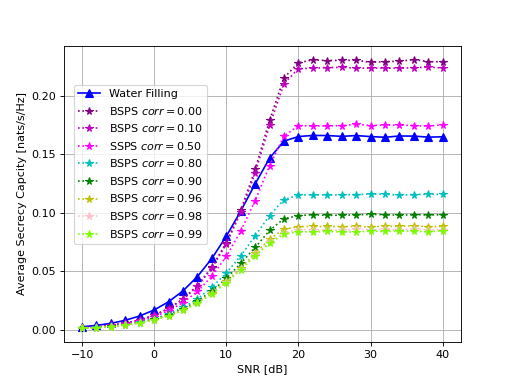

=== Water filling, SNR: -10 ===
=== Water filling, SNR: -8 ===
=== Water filling, SNR: -6 ===
=== Water filling, SNR: -4 ===
=== Water filling, SNR: -2 ===
=== Water filling, SNR: 0 ===
=== Water filling, SNR: 2 ===
=== Water filling, SNR: 4 ===
=== Water filling, SNR: 6 ===
=== Water filling, SNR: 8 ===
=== Water filling, SNR: 10 ===
=== Water filling, SNR: 12 ===
=== Water filling, SNR: 14 ===
=== Water filling, SNR: 16 ===
=== Water filling, SNR: 18 ===
=== Water filling, SNR: 20 ===
=== Water filling, SNR: 22 ===
=== Water filling, SNR: 24 ===
=== Water filling, SNR: 26 ===
=== Water filling, SNR: 28 ===
=== Water filling, SNR: 30 ===
=== Water filling, SNR: 32 ===
=== Water filling, SNR: 34 ===
=== Water filling, SNR: 36 ===
=== Water filling, SNR: 38 ===
=== Water filling, SNR: 40 ===
=== SNR: -10 ===
=== SNR: -8 ===
=== SNR: -6 ===
=== SNR: -4 ===
=== SNR: -2 ===
=== SNR: 0 ===
=== SNR: 2 ===
=== SNR: 4 ===
=== SNR: 6 ===
=== SNR: 8 ===
=== SNR: 10 ===
=== SNR: 12 ===
=== SNR: 1

In [3]:
## Chapter 4. Secrecy capacity. (Fig 1.)
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)

Nc1 = 64       ## Number of subcarriers
Nc = 64
N0 = 1        ## WTF? I just copied-and-pasted from web.
Npkt = 10000 ## Let's simulate 10000 packets.
G = 4         ## Block size.

MMSE = 10000

water_filling_rates = []
SNRs = [x for x in range(-10, 42, 2)]

def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

## Water filling.
for SNR in SNRs:
    ## Water filling algo.
    water_filling_rates_avg_rate = 0.0
    print('=== Water filling, SNR: {} ==='.format(SNR))
    for i in range(Npkt):
        P = 10 ** (SNR / 10)
        g1 = np.abs(np.random.randn(Nc1, 1))
        g2 = np.abs(np.random.randn(Nc1, 1))

        alpha_low = min(N0/g1)                # Initial low
        alpha_high = (P + np.sum(N0/g1)) / Nc1 # Initial high

        stop_threshold = 1e-5 # Stop threshold

        # Iterate while low/high bounds are further than stop_threshold
        while(np.abs(alpha_low - alpha_high) > stop_threshold):
            alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

            # Solve the power allocation
            p = 1/alpha - N0/g1
            p[p < 0] = 0

            # Test sum-power constraints
            if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                alpha_low = alpha
            else: # Less than power limit => increase the lower bound
                alpha_high = alpha

        ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
        water_filling_achievable_rate = np.sum(np.log((1 + g1 * p / N0) / (1 + g2 * p / N0)))
        water_filling_rates_avg_rate += water_filling_achievable_rate
    water_filling_rates.append(water_filling_rates_avg_rate / Npkt)

## SPS-1 algo.
sps1_rates = []

# for corr in [0.00, 0.1, 0.5, 0.80, 0.90, 0.96, 0.98, 0.99]:
#     sps1_rates_snr = []
#     for SNR in SNRs:
#         water_filling_rates_avg_rate = 0.0
#         print('=== SNR: {} ==='.format(SNR))
#         for i in range(Npkt):
#             P = 10 ** (SNR / 10)
#             n1 = np.random.randn(Nc, 1)
#             n2 = np.random.randn(Nc, 1)
#             g1 = np.abs(n1)
#             g2 = np.abs(n2)

#             alpha_low = min(N0/g1)                # Initial low
#             alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

#             stop_threshold = 1e-5 # Stop threshold

#             # Iterate while low/high bounds are further than stop_threshold
#             while(np.abs(alpha_low - alpha_high) > stop_threshold):
#                 alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

#                 # Solve the power allocation
#                 p = 1/alpha - N0/g1
#                 p[p < 0] = 0

#                 # Test sum-power constraints
#                 if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
#                     alpha_low = alpha
#                 else: # Less than power limit => increase the lower bound
#                     alpha_high = alpha

#             eps = 1 / (1 + MMSE * P)
#             Ha =  np.random.randn(1, Nc)
#             e1 = np.random.randn(1, Nc)
#             Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

#             H2 = (1 - corr) * np.random.randn(1, Nc) + corr * Ha
#             e2 = np.random.randn(1, Nc)
#             He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2

#             Inda = np.argsort(Ha)
#             Indb = np.argsort(Hb)
#             Inde = np.argsort(He)

#             seta = set(Inda[0][:32])
#             setb = set(Indb[0][:32])
#             sete = set(Inde[0][:32])

#             lenab = len(seta & setb)
#             lenae = len(seta & sete)


#             ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
#             water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc)) / (1 + (g2 * p / N0) * (lenae / Nc))))
#             water_filling_rates_avg_rate += water_filling_achievable_rate
#         sps1_rates_snr.append(water_filling_rates_avg_rate / Npkt)
#     sps1_rates.append(sps1_rates_snr)

## SSPS. algo.
ssps_rates = []
G = 4
for corr in [0.00, 0.1, 0.5, 0.80, 0.90, 0.96, 0.98, 0.99]:
    ssps_rates_snr = []
    for SNR in SNRs:
        water_filling_rates_avg_rate = 0.0
        print('=== SNR: {} ==='.format(SNR))
        for i in range(Npkt):
            P = 10 ** (SNR / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            eps = 1 / (1 + MMSE * P)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

            H2 = (1 - corr) * np.random.randn(1, Nc) + corr * Ha
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2
            
            lenab = 0
            lenae = 0

            for I in range(int(Nc / G)):
                ha = Ha[0][G * I : G * I + G]
                hb = Hb[0][G * I : G * I + G]
                he = He[0][G * I : G * I + G]

                inda = np.argsort(ha)
                indb = np.argsort(hb)
                inde = np.argsort(he)

                for II in range(G):
                    if inda[II] == indb[II]:
                        lenab += 1
                    if inda[II] == inde[II]:
                        lenae += 1

            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc)) / (1 + (g2 * p / N0) * (lenae / Nc))))
            water_filling_rates_avg_rate += water_filling_achievable_rate
        ssps_rates_snr.append(water_filling_rates_avg_rate / Npkt)
    ssps_rates.append(ssps_rates_snr)

## Water filling Baseline
ax.plot(SNRs, np.array(water_filling_rates) / Nc, color='b', marker='^', linestyle='solid', markersize=7, label=r'Water Filling')

## SPS.
# ax.plot(SNRs, np.array(sps1_rates[0]) / 2 / Nc, color='purple', marker='+', linestyle='dotted', markersize=7, label=r'SPS $ e=10^{-1} $')
# ax.plot(SNRs, np.array(sps1_rates[1]) / 2 / Nc, color='m', marker='+', linestyle='dotted', markersize=7, label=r'SPS $ e=10^{-2} $')
# ax.plot(SNRs, np.array(sps1_rates[2]) / 2 / Nc, color='r', marker='+', linestyle='solid', markersize=7, label=r'SPS $ e=10^{-3} $')
# ax.plot(SNRs, np.array(sps1_rates[3]) / 2 / Nc, color='c', marker='+', linestyle='dotted', markersize=7, label=r'SPS $ e=10^{-4} $')

## SPSS.
ax.plot(SNRs, np.array(ssps_rates[0]) / 2 / Nc, color='purple', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ corr=0.00 $')
ax.plot(SNRs, np.array(ssps_rates[1]) / 2 / Nc, color='m', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ corr=0.10 $')
ax.plot(SNRs, np.array(ssps_rates[2]) / 2 / Nc, color='fuchsia', marker='*', linestyle='dotted', markersize=7, label=r'SSPS $ corr=0.50 $')
ax.plot(SNRs, np.array(ssps_rates[3]) / 2 / Nc, color='c', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ corr=0.80 $')
ax.plot(SNRs, np.array(ssps_rates[4]) / 2 / Nc, color='g', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ corr=0.90 $')
ax.plot(SNRs, np.array(ssps_rates[5]) / 2 / Nc, color='y', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ corr=0.96 $')
ax.plot(SNRs, np.array(ssps_rates[6]) / 2 / Nc, color='pink', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ corr=0.98 $')
ax.plot(SNRs, np.array(ssps_rates[7]) / 2 / Nc, color='lawngreen', marker='*', linestyle='dotted', markersize=7, label=r'BSPS $ corr=0.99 $')

## Set position and blah blah ...
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(0.01, 0.6))

ax.set_ylabel('Average Secrecy Capcity [nats/s/Hz]')
ax.set_xlabel('SNR [dB]')
ax.grid(True, which='both')

plt.savefig('./4-3.png')

<IPython.core.display.Javascript object>


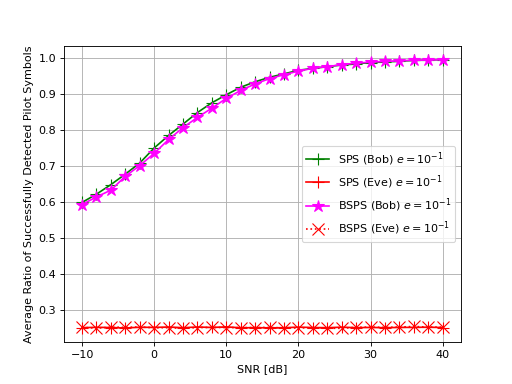

=== SNR: -10 ===
=== SNR: -8 ===
=== SNR: -6 ===
=== SNR: -4 ===
=== SNR: -2 ===
=== SNR: 0 ===
=== SNR: 2 ===
=== SNR: 4 ===
=== SNR: 6 ===
=== SNR: 8 ===
=== SNR: 10 ===
=== SNR: 12 ===
=== SNR: 14 ===
=== SNR: 16 ===
=== SNR: 18 ===
=== SNR: 20 ===
=== SNR: 22 ===
=== SNR: 24 ===
=== SNR: 26 ===
=== SNR: 28 ===
=== SNR: 30 ===
=== SNR: 32 ===
=== SNR: 34 ===
=== SNR: 36 ===
=== SNR: 38 ===
=== SNR: 40 ===
=== SNR: -10 ===
=== SNR: -8 ===
=== SNR: -6 ===
=== SNR: -4 ===
=== SNR: -2 ===
=== SNR: 0 ===
=== SNR: 2 ===
=== SNR: 4 ===
=== SNR: 6 ===
=== SNR: 8 ===
=== SNR: 10 ===
=== SNR: 12 ===
=== SNR: 14 ===
=== SNR: 16 ===
=== SNR: 18 ===
=== SNR: 20 ===
=== SNR: 22 ===
=== SNR: 24 ===
=== SNR: 26 ===
=== SNR: 28 ===
=== SNR: 30 ===
=== SNR: 32 ===
=== SNR: 34 ===
=== SNR: 36 ===
=== SNR: 38 ===
=== SNR: 40 ===


In [8]:
## Chapter 4. Secrecy capacity. (Fig 3.)
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)

Nc1 = 64       ## Number of subcarriers
Nc = 64
N0 = 1        ## WTF? I just copied-and-pasted from web.
Npkt = 1000 ## Let's simulate 10000 packets.
G = 4         ## Block size.

water_filling_rates = []
SNRs = [x for x in range(-10, 42, 2)]

## SPS-1 algo.
sps1_rates = []
ill_sps1_rates = []
for MMSE in [1]:
    sps1_rates_snr = []
    ill_sps1_rates_snr = []
    for SNR in SNRs:
        water_filling_rates_avg_rate = 0.0
        ill_water_filling_rates_avg_rate = 0.0
        print('=== SNR: {} ==='.format(SNR))
        for i in range(Npkt):
            P = 10 ** (SNR / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            eps = 1 / (1 + MMSE * P)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

            H2 = np.random.randn(1, Nc)
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2

            Inda = np.argsort(Ha)
            Indb = np.argsort(Hb)
            Inde = np.argsort(He)

            seta = set(Inda[0][:32])
            setb = set(Indb[0][:32])
            sete = set(Inde[0][:32])

            lenab = len(seta & setb)
            lenae = len(seta & sete)


            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc)) / (1 + (g2 * p / N0) * (lenae / Nc))))
            water_filling_rates_avg_rate += (lenab / Nc)
            ill_water_filling_rates_avg_rate += (lenae / Nc)
        sps1_rates_snr.append(water_filling_rates_avg_rate / Npkt)
        ill_sps1_rates_snr.append(ill_water_filling_rates_avg_rate / Npkt)
    sps1_rates.append(sps1_rates_snr)
    ill_sps1_rates.append(ill_sps1_rates_snr)

## SSPS. algo.
ssps_rates = []
ill_ssps_rates = []
G = 4
for MMSE in [1]:
    ssps_rates_snr = []
    ill_ssps_rates_snr = []
    for SNR in SNRs:
        water_filling_rates_avg_rate = 0.0
        ill_water_filling_rates_avg_rate = 0.0
        print('=== SNR: {} ==='.format(SNR))
        for i in range(Npkt):
            P = 10 ** (SNR / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (P + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > P): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            eps = 1 / (1 + MMSE * P)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * Ha + np.sqrt(eps) * (1 / np.sqrt(2)) * e1

            H2 = np.random.randn(1, Nc)
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - eps) * (1 / np.sqrt(2)) * H2 + np.sqrt(eps) * (1 / np.sqrt(2)) * e2
            
            lenab = 0
            lenae = 0

            for I in range(int(Nc / G)):
                ha = Ha[0][G * I : G * I + G]
                hb = Hb[0][G * I : G * I + G]
                he = He[0][G * I : G * I + G]

                inda = np.argsort(ha)
                indb = np.argsort(hb)
                inde = np.argsort(he)

                lenab += len(set(inda[:2]) & set(indb[:2]))
                lenae += len(set(inda[:2]) & set(inde[:2]))

            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc)) / (1 + (g2 * p / N0) * (lenae / Nc))))
            water_filling_rates_avg_rate += (lenab / Nc)
            ill_water_filling_rates_avg_rate += (lenae / Nc)
        ssps_rates_snr.append(water_filling_rates_avg_rate / Npkt)
        ill_ssps_rates_snr.append(ill_water_filling_rates_avg_rate / Npkt)
    ssps_rates.append(ssps_rates_snr)
    ill_ssps_rates.append(ill_ssps_rates_snr)

## Water filling Baseline
# ax.plot(SNRs, np.array(water_filling_rates) / Nc, color='b', marker='x', linestyle='solid', markersize=7, label=r'Water Filling')


ax.plot(SNRs, np.array(sps1_rates[0]) * 2, color='g', marker='+', linestyle='solid', markersize=11, label=r'SPS (Bob) $ e=10^{-1} $')
ax.plot(SNRs, np.array(ill_sps1_rates[0]), color='r', marker='+', linestyle='solid', markersize=11, label=r'SPS (Eve) $ e=10^{-1} $')
ax.plot(SNRs, np.array(ssps_rates[0]) * 2, color='fuchsia', marker='*', linestyle='solid', markersize=11, label=r'BSPS (Bob) $ e=10^{-1} $')
ax.plot(SNRs, np.array(ill_ssps_rates[0]), color='r', marker='x', linestyle='dotted', markersize=11, label=r'BSPS (Eve) $ e=10^{-1} $')



ax.legend(loc='center right')

ax.set_ylabel('Average Ratio of Successfully Detected Pilot Symbols')
ax.set_xlabel('SNR [dB]')
ax.grid(True, which='both')

plt.savefig('./4-4.png')

In [ ]:
## Chapter 4. Secrecy capacity. (Fig 1.)
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')

Nc1 = 64       ## Number of subcarriers
Nc = 64
N0 = 1        ## WTF? I just copied-and-pasted from web.
Npkt = 10000 ## Let's simulate 10000 packets.
G = 4         ## Block size.

X = np.array([x for x in range(-10, 42, 2)])
Y = np.array([y for y in range(-10, 42, 2)])

## SSPS. algo.
Z = np.zeros([len(X), len(Y)])
G = 4
MMSE = 1

for x, SNRx in enumerate(X):
    for y, SNRy in enumerate(Y):
        water_filling_rates_avg_rate = 0.0
        print(SNRx, SNRy)
        for i in range(Npkt):
            Px = 10 ** (SNRx / 10)
            Py = 10 ** (SNRy / 10)
            n1 = np.random.randn(Nc, 1)
            n2 = np.random.randn(Nc, 1)
            g1 = np.abs(n1)
            g2 = np.abs(n2)

            alpha_low = min(N0/g1)                # Initial low
            alpha_high = (Px + np.sum(N0/g1)) / Nc # Initial high

            stop_threshold = 1e-5 # Stop threshold

            # Iterate while low/high bounds are further than stop_threshold
            while(np.abs(alpha_low - alpha_high) > stop_threshold):
                alpha = (alpha_low + alpha_high) / 2 # Test value in the middle of low/high

                # Solve the power allocation
                p = 1/alpha - N0/g1
                p[p < 0] = 0

                # Test sum-power constraints
                if (np.sum(p) > Px): # Exceeds power limit => lower the upper bound
                    alpha_low = alpha
                else: # Less than power limit => increase the lower bound
                    alpha_high = alpha

            epsx = 1 / (1 + MMSE * Px)
            epsy = 1 / (1 + MMSE * Py)
            Ha =  np.random.randn(1, Nc)
            e1 = np.random.randn(1, Nc)
            Hb = np.sqrt(1 - epsx) * (1 / np.sqrt(2)) * Ha + np.sqrt(epsx) * (1 / np.sqrt(2)) * e1

            H2 = Hb##np.random.randn(1, Nc)
            e2 = np.random.randn(1, Nc)
            He = np.sqrt(1 - epsy) * (1 / np.sqrt(2)) * H2 + np.sqrt(epsy) * (1 / np.sqrt(2)) * e2

            lenab = 0
            lenae = 0

            for I in range(int(Nc / G)):
                ha = Ha[0][G * I : G * I + G]
                hb = Hb[0][G * I : G * I + G]
                he = He[0][G * I : G * I + G]

                inda = np.argsort(ha)
                indb = np.argsort(hb)
                inde = np.argsort(he)

                for II in range(G):
                    if inda[II] == indb[II]:
                        lenab += 1
                    if inda[II] == inde[II]:
                        lenae += 1

            ## I(Alice; bob | Eve) = I(Alice; Bob) - I(Alice; Eve)
            water_filling_achievable_rate = np.sum(np.log((1 + (g1 * p / N0) * (lenab / Nc)) / (1 + (g2 * p / N0) * (lenae / Nc)))) - np.sum(np.log((1 + (g1 * p / N0)) / (1 + (g2 * p / N0) )))
            water_filling_rates_avg_rate += water_filling_achievable_rate
        Z[x][y] = water_filling_rates_avg_rate / Npkt

ax.contourf3D(X, Y, Z, 50)
ax.set_xlabel("Wiretapped Channel SNR [dB]")
ax.set_ylabel("Legitimate Channel SNR [dB]")
ax.set_zlabel('Average Secrecy Capacity [nats/s/Hz]')
plt.savefig('./4-5.png')

<IPython.core.display.Javascript object>

-10 -10
-10 -8
-10 -6
-10 -4
-10 -2
-10 0
-10 2
-10 4
-10 6
-10 8
-10 10
-10 12
-10 14
-10 16
-10 18
-10 20
-10 22
-10 24
-10 26
-10 28
-10 30
-10 32
-10 34
-10 36
-10 38
-10 40
-8 -10
-8 -8
-8 -6
-8 -4
-8 -2
-8 0
-8 2
-8 4
-8 6
-8 8
-8 10
-8 12
-8 14
-8 16
-8 18
-8 20
-8 22
-8 24
-8 26
-8 28
-8 30
-8 32
-8 34
-8 36
-8 38
-8 40
-6 -10
-6 -8
-6 -6
-6 -4
-6 -2
-6 0
-6 2
-6 4
-6 6
-6 8
-6 10
-6 12
-6 14
-6 16
-6 18
-6 20
-6 22
-6 24
-6 26
-6 28
-6 30
-6 32
-6 34
-6 36
-6 38
-6 40
-4 -10
-4 -8
-4 -6
-4 -4
-4 -2
-4 0
-4 2
-4 4
-4 6
-4 8
-4 10
-4 12
-4 14
-4 16
-4 18
-4 20
-4 22
-4 24
-4 26
-4 28
-4 30
-4 32
-4 34
-4 36
-4 38
-4 40
-2 -10
-2 -8
-2 -6
-2 -4
-2 -2
-2 0
-2 2
-2 4
-2 6
-2 8
-2 10
-2 12
-2 14
-2 16
-2 18
-2 20
-2 22
-2 24
-2 26
-2 28
-2 30
-2 32
-2 34
-2 36
-2 38
-2 40
0 -10
0 -8
0 -6
0 -4
0 -2
0 0
0 2
0 4
0 6
0 8
0 10
0 12
0 14
0 16
0 18
0 20
0 22
0 24
0 26
0 28
0 30
0 32
0 34
0 36
0 38
0 40
2 -10
2 -8
2 -6
2 -4
2 -2
2 0
2 2
2 4
2 6
2 8
2 10
2 12
2 14
2 16
2 18
2 20
2 22
2 24
2 

<IPython.core.display.Javascript object>


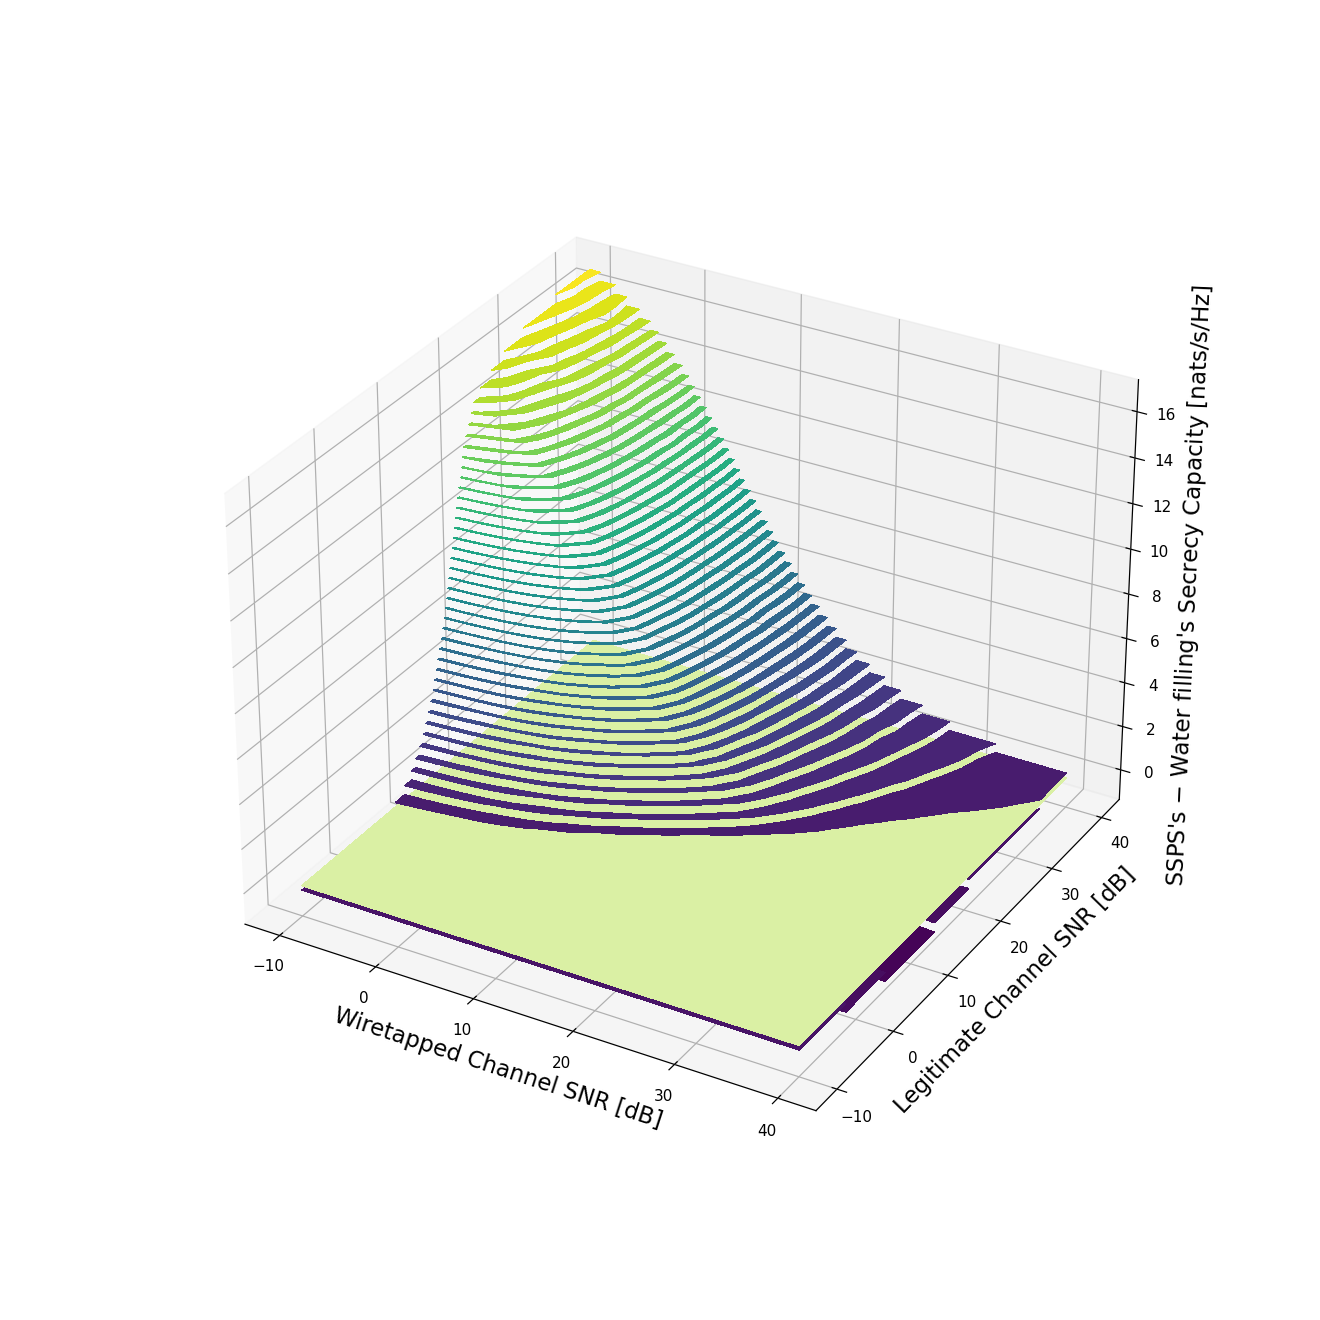

(26, 26)


In [29]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

Z2 = np.zeros((len(X), len(Y)))
print(Z2.shape)
ax.contourf3D(X, Y, Z, 50)
ax.contourf3D(X, Y, Z2, 50, cmap='YlGn')
ax.set_xlabel("Wiretapped Channel SNR [dB]", fontsize=15)
ax.set_ylabel("Legitimate Channel SNR [dB]", fontsize=15)
ax.set_zlabel("BSPS's $ - $ Water filling's Secrecy Capacity [nats/s/Hz]", fontsize=15)

plt.savefig('./4-5.png')

<IPython.core.display.Javascript object>


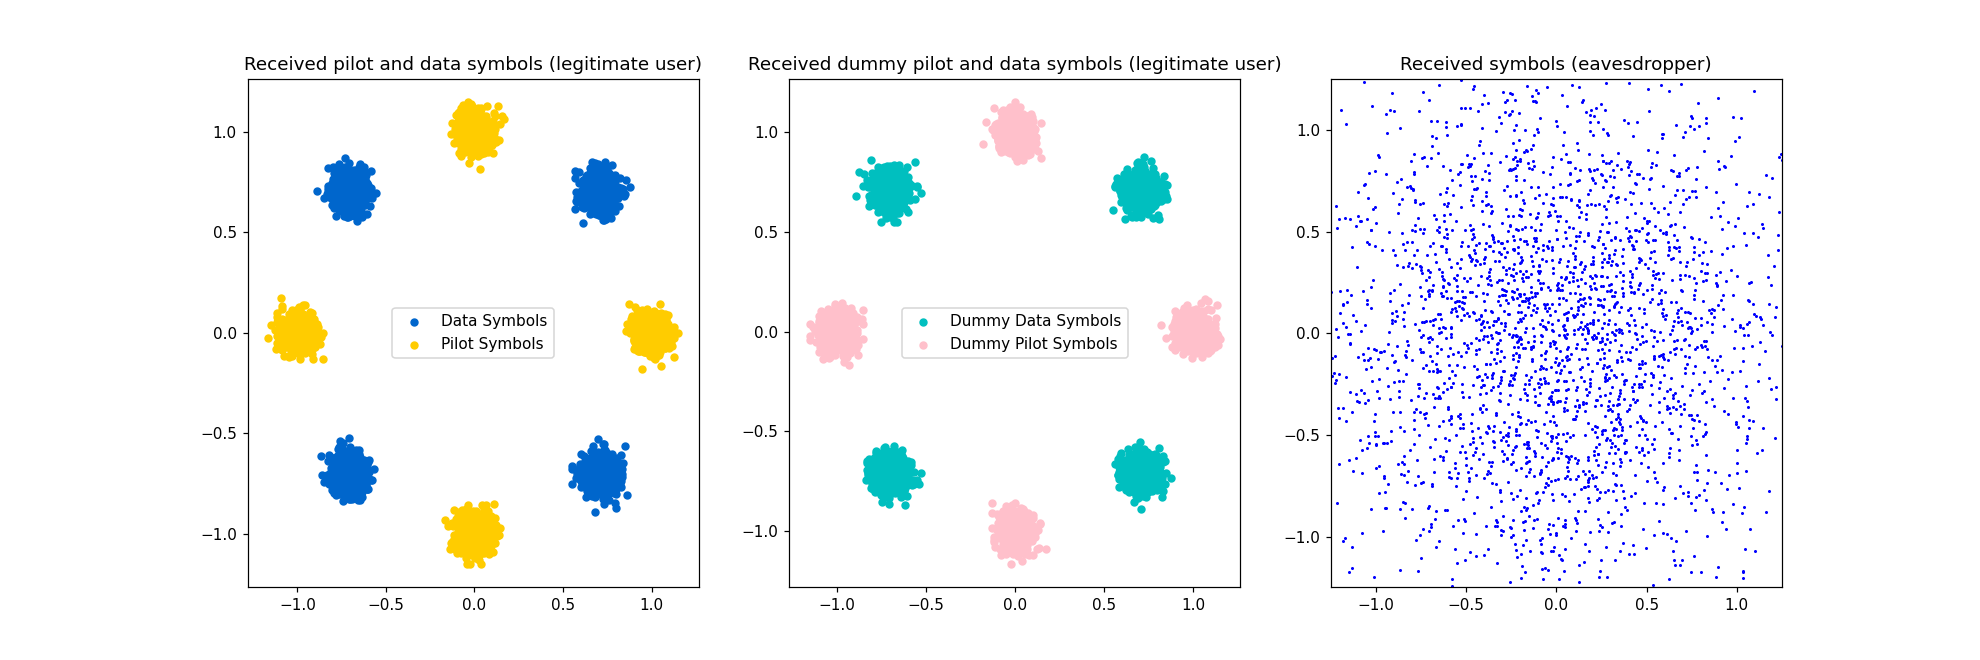

In [97]:
## Constellation plot
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
# ax4 = plt.subplot(224)

pilot = np.array([-1, 1, 1j, -1j])
data = np.array([-1+1j, -1-1j, 1+1j, 1-1j])

data_x1 = []
data_y1 = []

pilot_x1 = []
pilot_y1 = []

dummy_data_x2 = []
dummy_data_y2 = []

dummy_pilot_x2 = []
dummy_pilot_y2 = []


data_x3 = []
data_y3 = []

pilot_x3 = []
pilot_y3 = []

dummy_data_x4 = []
dummy_data_y4 = []

dummy_pilot_x4 = []
dummy_pilot_y4 = []

scale = 0.707
corr = 0.1

for pkt in range(700):
    for d in data:
        data_x = d.real * scale + 0.05 * np.random.randn(1)
        data_y = d.imag * scale + 0.05 * np.random.randn(1)

        data_x1.append(data_x)
        data_y1.append(data_y)
        
        dummy_data_x2.append(data_y)
        dummy_data_y2.append(data_x)
        
        data_xx = corr * data_x + (1 - corr) * np.random.randn(1)
        data_yy = corr * data_y + (1 - corr) * np.random.randn(1)
        
#         if (abs(data_xx) ** 2 + abs(data_yy) ** 2 < 1.5 ** 2):
        data_x3.append(data_xx * scale)
        data_y3.append(data_yy * scale)
        
        dummy_data_xx = corr * data_y + (1 - corr) * np.random.randn(1)
        dummy_data_yy = corr * data_x + (1 - corr) * np.random.randn(1)
        
        dummy_data_x4.append(dummy_data_xx * scale / 2)
        dummy_data_y4.append(dummy_data_yy * scale / 2)
    for p in pilot:
        pilot_x = p.real + 0.05 * np.random.randn(1)
        pilot_y = p.imag + 0.05 * np.random.randn(1)

        pilot_x1.append(pilot_x)
        pilot_y1.append(pilot_y)
        
        dummy_pilot_x2.append(pilot_y)
        dummy_pilot_y2.append(pilot_x)
        
        pilot_xx = corr * pilot_x + (1 - corr) * np.random.randn(1)
        pilot_yy = corr * pilot_y + (1 - corr) * np.random.randn(1)
        
        pilot_x3.append(pilot_xx)
        pilot_y3.append(pilot_yy)

        dummy_pilot_xx = corr * pilot_y + (1 - corr) * np.random.randn(1)
        dummy_pilot_yy = corr * pilot_x + (1 - corr) * np.random.randn(1)
        
        dummy_pilot_x4.append(dummy_pilot_xx * scale)
        dummy_pilot_y4.append(dummy_pilot_yy * scale)

ax1.scatter(data_x1, data_y1, [20], c=['#0066cc'], label='Data Symbols')
ax1.scatter(pilot_x1, pilot_y1, [20], c=['#ffcc00'], label='Pilot Symbols')

ax1.set_title('Received pilot and data symbols (legitimate user)')
ax1.legend(loc='center')

ax2.scatter(dummy_data_x2, dummy_data_y2, [20], c=['c'], label='Dummy Data Symbols')
ax2.scatter(dummy_pilot_x2, dummy_pilot_y2, [20], c=['pink'], label='Dummy Pilot Symbols')
ax2.legend()

ax2.set_title('Received dummy pilot and data symbols (legitimate user)')
ax2.legend(loc='center')

ax3.scatter(data_x3, data_y3, [1], c=['b'], label='Data Symbols')
ax3.set_ylim(-1.25, 1.25)
ax3.set_xlim(-1.25, 1.25)

ax3.set_title('Received symbols (eavesdropper)')
# ax1.legend(loc='center')

plt.savefig('./data-pilot-symbols.png')

<IPython.core.display.Javascript object>


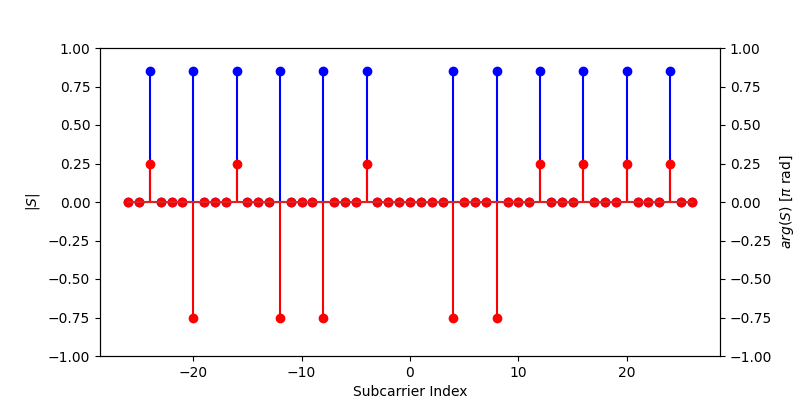

In [72]:
## Constellation plot
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 4))
# fig = plt.figure()
ax = plt.subplot(111)
subcarrier_index = [x for x in range(-26, 27)]
symbols = [0, 0, 1+1j, 0, 0, 0, -1-1j, 0, 0, 0, 1+1j, 0, 0, 0, -1-1j, 0, 0, 0, -1-1j, 0, 0, 0, 1+1j, 0, 0, 0, 0,0, 0, 0, -1-1j, 0, 0, 0, -1-1j, 0, 0, 0, 1+1j, 0, 0, 0, 1+1j, 0, 0, 0, 1+1j, 0, 0, 0, 1+1j, 0,0]

ax.stem(subcarrier_index, (np.sqrt(13) / 6) * np.abs(symbols), linefmt='b', markerfmt='bo')
ax.set_ylim(-1, 1)
ax.set_xlabel('Subcarrier Index')
ax.set_ylabel('$ |S| $')

ax2 = ax.twinx()
ax2.stem(subcarrier_index, np.angle(symbols) / np.pi, linefmt='r', markerfmt='ro')
ax2.set_facecolor(None)
ax2.set_ylim(-1, 1)
ax2.set_ylabel('$ arg(S) $ [$\pi$ rad]')
# ax.legend(['$ {Amp} $'], loc=(0.8, 0.1))
# ax2.legend(['$ {Arg} $'], loc=(0.8, 0.2))
plt.savefig('./sts.png')

<IPython.core.display.Javascript object>


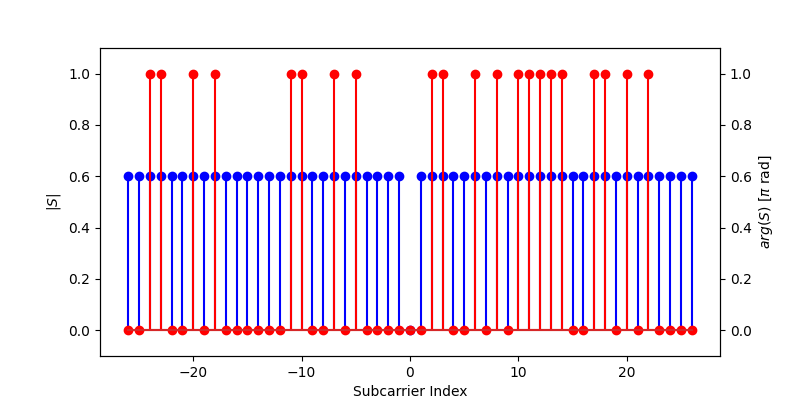

In [55]:
## Constellation plot
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 4))
# fig = plt.figure()
ax = plt.subplot(111)
subcarrier_index = [x for x in range(-26, 27)]
symbols = [1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 0, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1]

ax.stem(subcarrier_index, (np.sqrt(13) / 6) * np.abs(symbols), linefmt='b', markerfmt='bo')
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('Subcarrier Index')
ax.set_ylabel('$ |S| $')

ax2 = ax.twinx()
ax2.stem(subcarrier_index, np.angle(symbols) / np.pi, linefmt='r', markerfmt='ro')
ax2.set_facecolor(None)
ax2.set_ylim(-0.1, 1.1)
ax2.set_ylabel('$ arg(S) $ [$\pi$ rad]')

plt.savefig('./lts.png')